***
### CAPSTONE PROJECT 3: FEATURE ENGINEERING/PRE-PROCESSING/MODELING ###
***
- Review the PCA's generated from the DATA CLEANING/EDA 
- Determine how many PCAs required
- Deterrmine if only most important Eigen values from PCAs would be sufficient to model.
- separate table into X and y sets.
- create Train and test data sets.
- setup ARIMA models
- setup LSTM Model
- setup VAR model.
- train models
- evaluate models.
- decide which model serves best and why.

In [3]:
# Basic Data Science Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Models to test and scalar
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
#   LSTM
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

# VARMAX
from statsmodels.tsa.statespace.varmax import VARMAX

# Model Metrics
from sklearn.metrics import mean_squared_error


2024-04-24 07:04:10.118882: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


***
##### FEATURE ENGINEERING
***
Determine Number of PCA's Required or if only important Eigen values from PCAs would be sufficient for our model

In [4]:
# Linux
bitcoin_df = pd.read_csv('./Data/bitcoin_df_cleaned')
most_important_features = pd.read_csv('./Data/most_important_features')

# Windows
# bitcoin_df = pd.read_csv(r'C:\Users\micha\OneDrive\Documents\GitHub\SpringBoardDataScience\Capstone_Project_3\Data\bitcoin_df_cleaned')
# most_important_features = pd.read_csv(r'C:\Users\micha\OneDrive\Documents\GitHub\SpringBoardDataScience\Capstone_Project_3\Data\most_important_features')

In [5]:
bitcoin_df.head()

,date,USD Exchange Trade Volume,Total Transaction Fees USD,Total Transaction Fees,Total Output Volume,Total Bitcoins,Transaction Excluding Popular Addresses,Number of Transactions per Block,Total Number of Transactions,Number of Transactions,...,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12
0,2009-01-03,0.0,0.0,0.0,0.0,50.0,0.0,1.0,1.0,0.0,...,0.569534,-0.630067,-0.083165,0.001835,0.248596,0.335601,-0.598022,0.023777,0.345126,-0.201025
1,2009-01-04,0.0,0.0,0.0,0.0,50.0,0.0,1.0,1.0,0.0,...,0.569534,-0.630067,-0.083165,0.001835,0.248596,0.335601,-0.598022,0.023777,0.345126,-0.201025
2,2009-01-05,0.0,0.0,0.0,0.0,50.0,0.0,1.0,1.0,0.0,...,0.569534,-0.630067,-0.083165,0.001835,0.248596,0.335601,-0.598022,0.023777,0.345126,-0.201025
3,2009-01-06,0.0,0.0,0.0,0.0,50.0,0.0,1.0,1.0,0.0,...,0.569534,-0.630067,-0.083165,0.001835,0.248596,0.335601,-0.598022,0.023777,0.345126,-0.201025
4,2009-01-07,0.0,0.0,0.0,0.0,50.0,0.0,1.0,1.0,0.0,...,0.569534,-0.630067,-0.083165,0.001835,0.248596,0.335601,-0.598022,0.023777,0.345126,-0.201025


In [6]:
bitcoin_df.columns

Index(['date', 'USD Exchange Trade Volume', 'Total Transaction Fees USD',
       'Total Transaction Fees', 'Total Output Volume', 'Total Bitcoins',
       'Transaction Excluding Popular Addresses',
       'Number of Transactions per Block', 'Total Number of Transactions',
       'Number of Transactions', 'Number of Unique Addresses Used',
       'My Wallet Transaction Volume', 'My Wallet Number of Users',
       'Number of Transactions per Day', 'Market Capitalization',
       'Market Price', 'Miners Revenue', 'Hash Rate',
       'Estimated Transaction Volume USD', 'Estimated Transaction Volume',
       'Difficulty', 'Cost Percent of Transaction Volume',
       'Cost per Transaction', 'API Blockchain Size', 'Average Block Size',
       'Median Transaction Confirmation Time', 'PCA1', 'PCA2', 'PCA3', 'PCA4',
       'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11', 'PCA12'],
      dtype='object')

In [7]:
print(most_important_features['Feature Name'])

0                             Difficulty
1                  Market Capitalization
2       Estimated Transaction Volume USD
3              USD Exchange Trade Volume
4           Total Number of Transactions
5                              Hash Rate
6              My Wallet Number of Users
7                         Miners Revenue
8              My Wallet Number of Users
9                    Total Output Volume
10            Total Transaction Fees USD
11    Cost Percent of Transaction Volume
Name: Feature Name, dtype: object


Since we're dealing with Cybercurrency rather than stocks, we should resample this data taking the final value per month and also start performing percentchanges per column and autocorrelation functions as we curate a final feature set with which to model.

In [8]:
bitcoin_df.head()

,date,USD Exchange Trade Volume,Total Transaction Fees USD,Total Transaction Fees,Total Output Volume,Total Bitcoins,Transaction Excluding Popular Addresses,Number of Transactions per Block,Total Number of Transactions,Number of Transactions,...,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12
0,2009-01-03,0.0,0.0,0.0,0.0,50.0,0.0,1.0,1.0,0.0,...,0.569534,-0.630067,-0.083165,0.001835,0.248596,0.335601,-0.598022,0.023777,0.345126,-0.201025
1,2009-01-04,0.0,0.0,0.0,0.0,50.0,0.0,1.0,1.0,0.0,...,0.569534,-0.630067,-0.083165,0.001835,0.248596,0.335601,-0.598022,0.023777,0.345126,-0.201025
2,2009-01-05,0.0,0.0,0.0,0.0,50.0,0.0,1.0,1.0,0.0,...,0.569534,-0.630067,-0.083165,0.001835,0.248596,0.335601,-0.598022,0.023777,0.345126,-0.201025
3,2009-01-06,0.0,0.0,0.0,0.0,50.0,0.0,1.0,1.0,0.0,...,0.569534,-0.630067,-0.083165,0.001835,0.248596,0.335601,-0.598022,0.023777,0.345126,-0.201025
4,2009-01-07,0.0,0.0,0.0,0.0,50.0,0.0,1.0,1.0,0.0,...,0.569534,-0.630067,-0.083165,0.001835,0.248596,0.335601,-0.598022,0.023777,0.345126,-0.201025


In [9]:
# Linux Machine
# bitcoin_df['date'] = pd.to_datetime(bitcoin_df['date'])
# bitcoin_df.set_index('date', inplace=True)
# monthly_bitcoin_df = bitcoin_df.resample(rule='ME').last()

# Windows Machine
bitcoin_df['date'] = pd.to_datetime(bitcoin_df['date'])
bitcoin_df.set_index('date', inplace=True)
monthly_bitcoin_df = bitcoin_df.resample(rule='M').last()

In [10]:
monthly_bitcoin_df.head()

,USD Exchange Trade Volume,Total Transaction Fees USD,Total Transaction Fees,Total Output Volume,Total Bitcoins,Transaction Excluding Popular Addresses,Number of Transactions per Block,Total Number of Transactions,Number of Transactions,Number of Unique Addresses Used,...,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12
date,,,,,,,,,,,,,,,,,,,,,
2009-01-31,0.0,0.0,0.0,6900.0,131350.0,118.0,1.0000,2660.0,118.0,118.0,...,0.565633,-0.624664,-0.082270,0.002458,0.245686,0.332645,-0.596459,0.024101,0.338810,-0.197246
2009-02-28,0.0,0.0,0.0,5650.0,300350.0,107.0,1.0101,5894.0,100.0,107.0,...,0.560841,-0.624533,-0.080818,-0.003430,0.245534,0.330761,-0.590856,0.024245,0.331745,-0.193094
2009-03-31,0.0,0.0,0.0,7100.0,473700.0,111.0,1.0000,9564.0,107.0,107.0,...,0.555870,-0.622593,-0.083748,-0.008178,0.244914,0.328785,-0.585899,0.024475,0.324328,-0.188681
2009-04-30,0.0,0.0,0.0,6550.0,646200.0,131.0,1.0000,13031.0,123.0,123.0,...,0.550927,-0.620732,-0.084030,-0.011903,0.243679,0.325225,-0.581295,0.024595,0.316735,-0.184322
2009-05-31,0.0,0.0,0.0,3700.0,814050.0,74.0,1.0000,16407.0,74.0,97.0,...,1.504016,-3.840696,64.677784,0.338447,-3.467730,-0.868214,1.005480,-0.029261,-0.245632,0.111518


In [11]:
most_important_features_list = list(most_important_features['Feature Name'].unique())

In [12]:
def feature_correlation(df, feature_list):
    pct_change_df = pd.DataFrame()
    for feature in feature_list:
       pct_change_df[f'{feature}_RET']  = df[feature].pct_change()
       
    corr = pct_change_df.corr()
    sns.heatmap(corr)

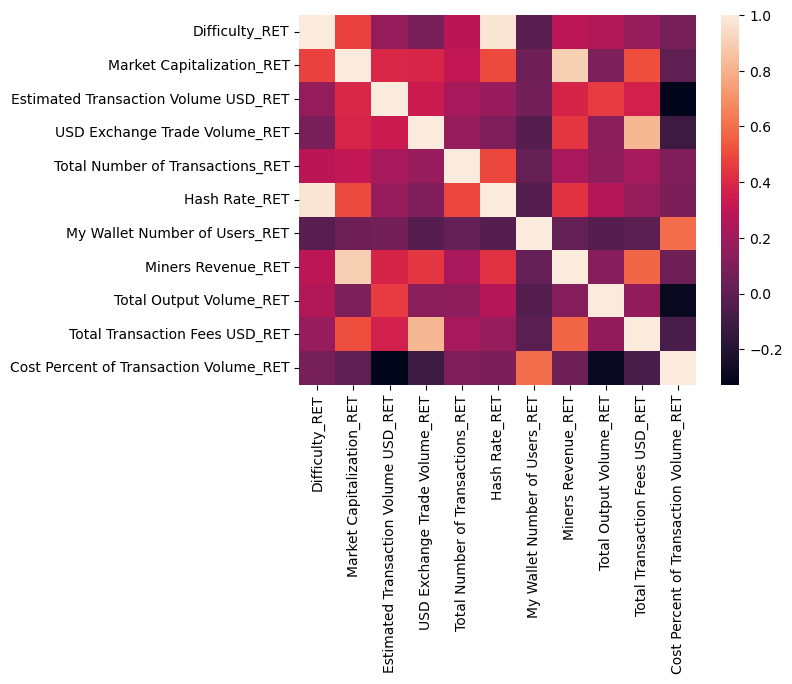

In [13]:
_ = feature_correlation(monthly_bitcoin_df, most_important_features_list)

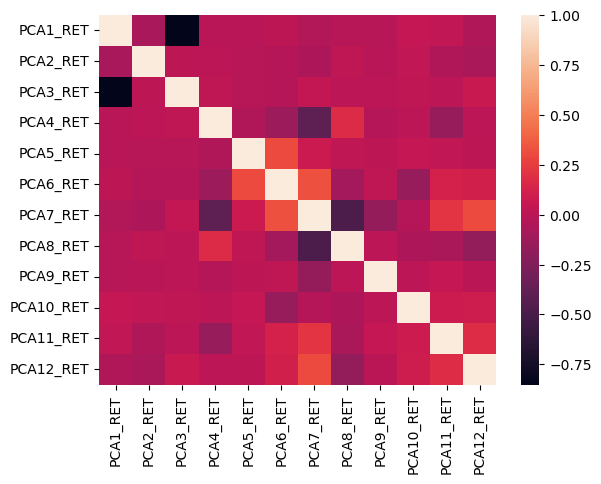

In [14]:
PCA_list = ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11', 'PCA12']
pct_change_df = feature_correlation(monthly_bitcoin_df, PCA_list)

These heatmaps pretty clearly say that for our feature set, we should use our curated PCAs rather then the primary Eigen values particularly since their degree of correlation is almost all zero which means little to no correlation between these PC vectors.  which for a multivariate time series analysis is exactly what we want.  NO CONFOUNDING VARIABLES!

In [15]:
monthly_pca_bitcoin_df = monthly_bitcoin_df[PCA_list]
monthly_pca_bitcoin_df['Market Price'] = monthly_bitcoin_df.loc[:,'Market Price']

/tmp/ipykernel_3375/203295870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_pca_bitcoin_df['Market Price'] = monthly_bitcoin_df.loc[:,'Market Price']


In [16]:
monthly_pca_bitcoin_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,Market Price
date,,,,,,,,,,,,,
2009-01-31,-4.311894,-1.941027,0.565633,-0.624664,-0.082270,0.002458,0.245686,0.332645,-0.596459,0.024101,0.338810,-0.197246,0.0
2009-02-28,-4.305432,-1.935971,0.560841,-0.624533,-0.080818,-0.003430,0.245534,0.330761,-0.590856,0.024245,0.331745,-0.193094,0.0
2009-03-31,-4.298641,-1.929858,0.555870,-0.622593,-0.083748,-0.008178,0.244914,0.328785,-0.585899,0.024475,0.324328,-0.188681,0.0
2009-04-30,-4.291903,-1.923502,0.550927,-0.620732,-0.084030,-0.011903,0.243679,0.325225,-0.581295,0.024595,0.316735,-0.184322,0.0
2009-05-31,-4.724830,-3.294112,1.504016,-3.840696,64.677784,0.338447,-3.467730,-0.868214,1.005480,-0.029261,-0.245632,0.111518,0.0


In [17]:
pct_change_df = pd.DataFrame()
for feature in PCA_list:
    pct_change_df[f'{feature}_RET']  = monthly_bitcoin_df[feature].pct_change()

In [18]:
for col in pct_change_df.columns:
    print(f'Autocorrelation for {col} is: {pct_change_df[col]}')

Autocorrelation for PCA1_RET is: date
2009-01-31         NaN
2009-02-28   -0.001499
2009-03-31   -0.001577
2009-04-30   -0.001567
2009-05-31    0.100871
                ...   
2023-12-31    0.454556
2024-01-31   -0.199415
2024-02-29    0.252745
2024-03-31   -0.158165
2024-04-30    0.118616
Freq: ME, Name: PCA1_RET, Length: 184, dtype: float64
Autocorrelation for PCA2_RET is: date
2009-01-31         NaN
2009-02-28   -0.002604
2009-03-31   -0.003158
2009-04-30   -0.003294
2009-05-31    0.712560
                ...   
2023-12-31   -0.723025
2024-01-31    3.189300
2024-02-29    0.517368
2024-03-31    0.343781
2024-04-30   -0.157031
Freq: ME, Name: PCA2_RET, Length: 184, dtype: float64
Autocorrelation for PCA3_RET is: date
2009-01-31         NaN
2009-02-28   -0.008472
2009-03-31   -0.008864
2009-04-30   -0.008892
2009-05-31    1.729972
                ...   
2023-12-31   -4.201994
2024-01-31   -1.110915
2024-02-29   -9.887594
2024-03-31   -1.083249
2024-04-30   -3.216972
Freq: ME, Name: PCA

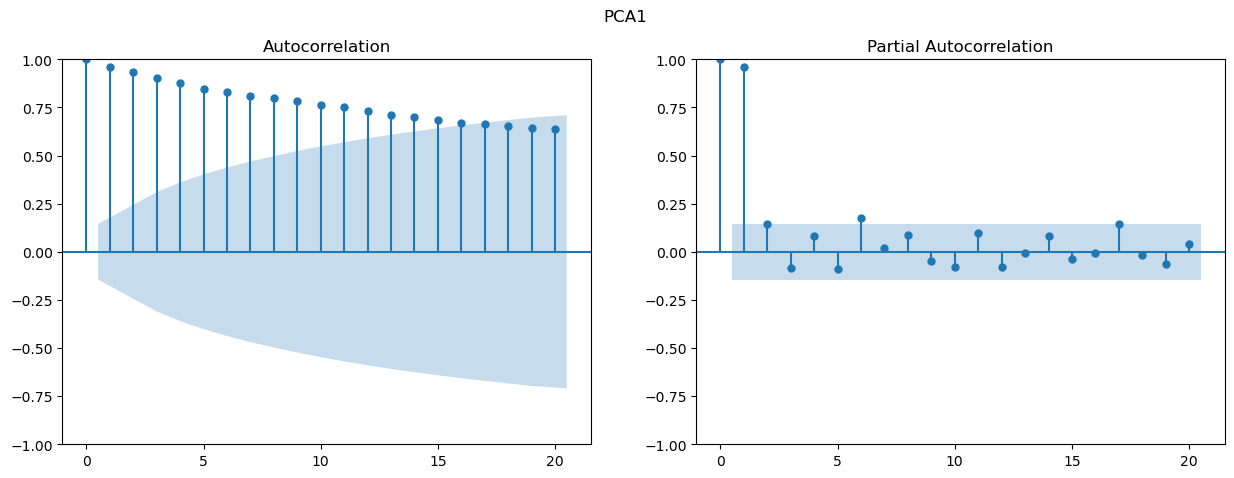

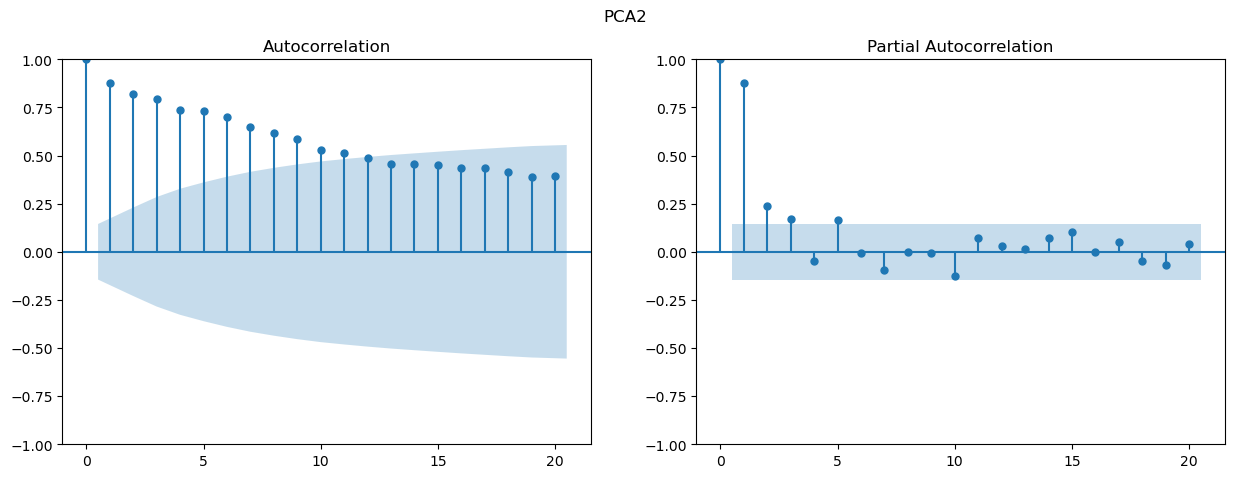

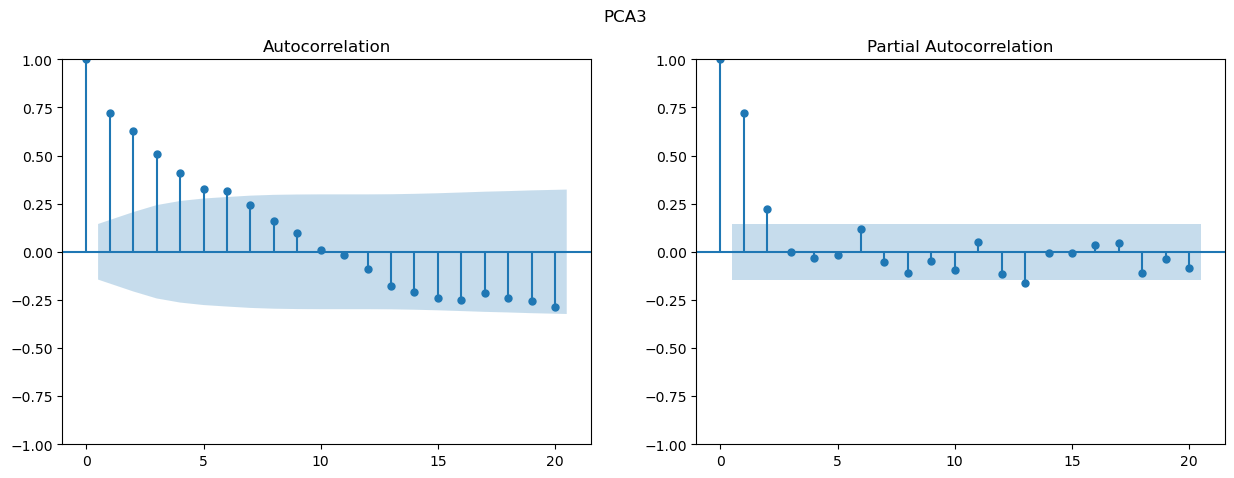

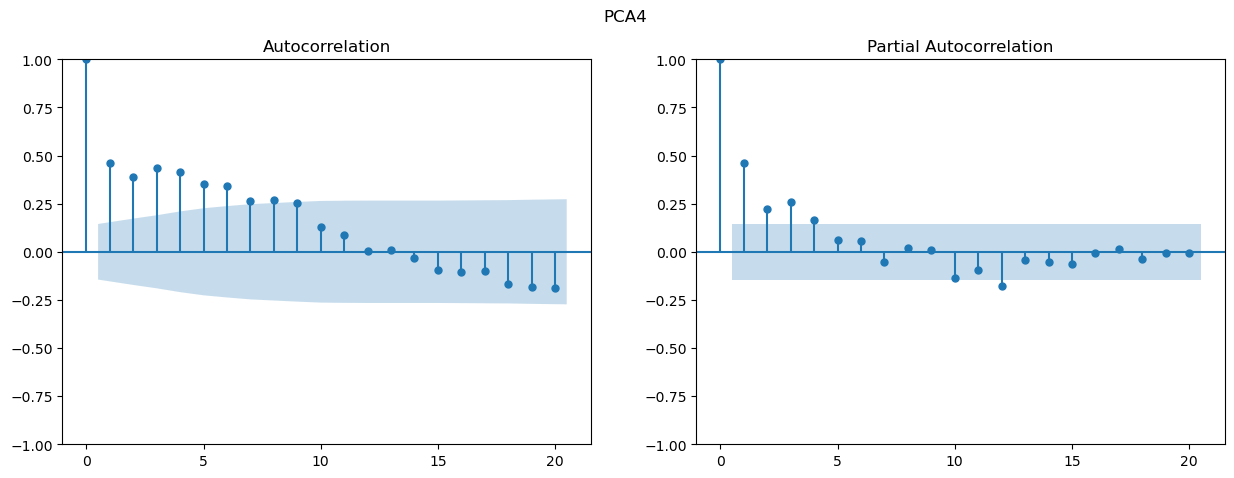

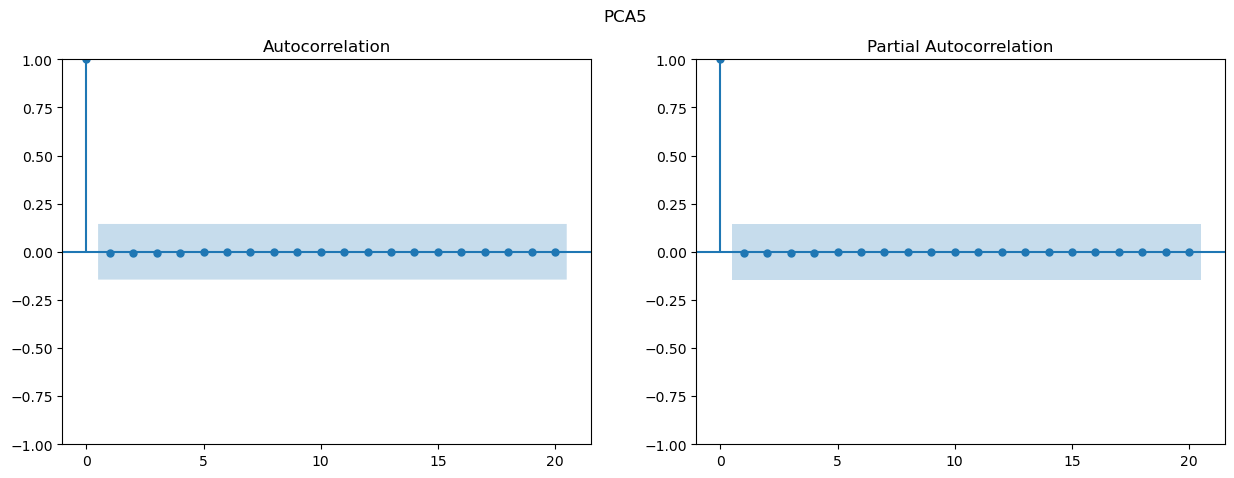

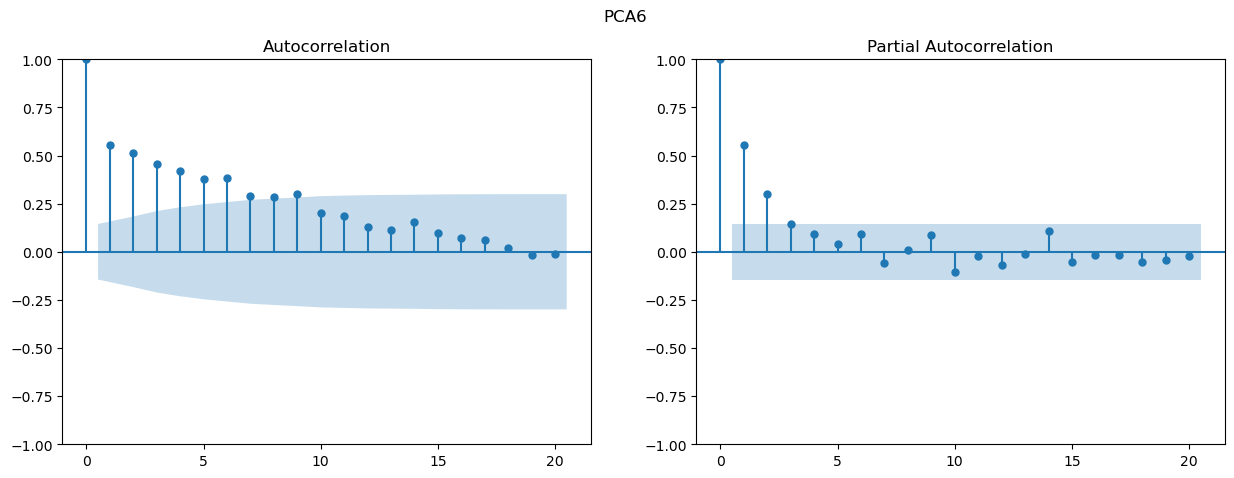

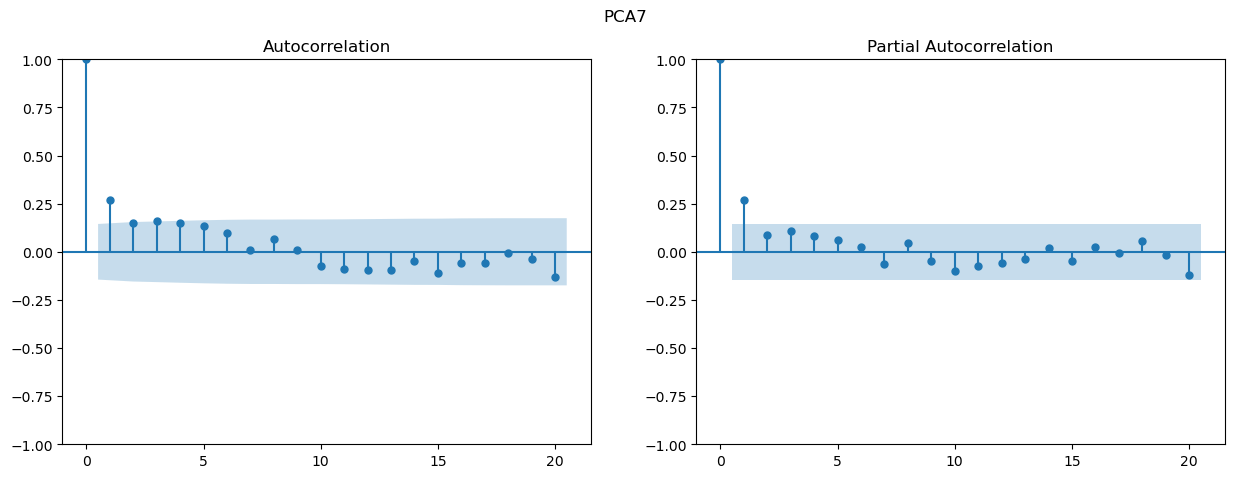

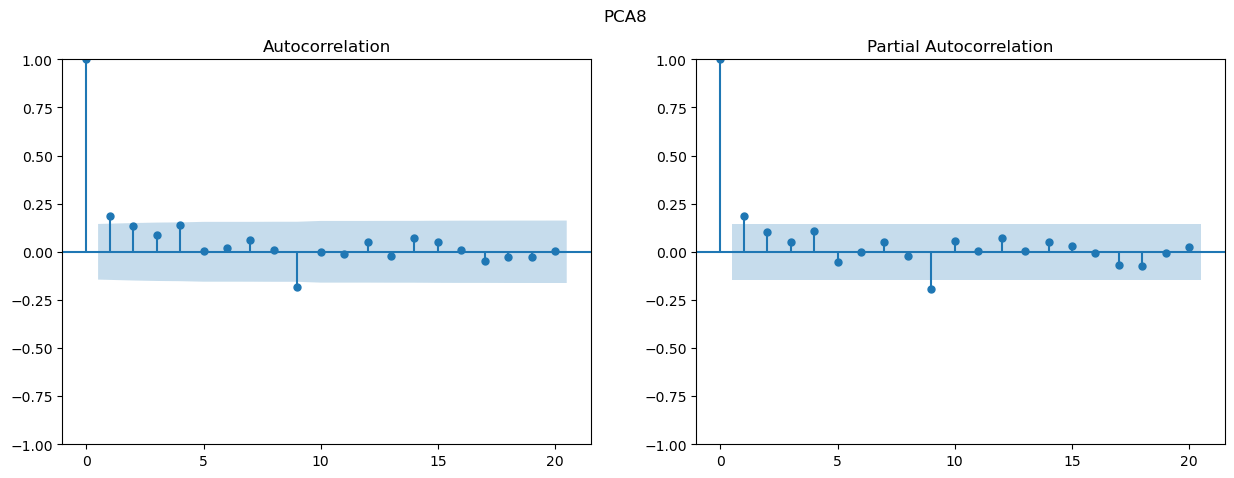

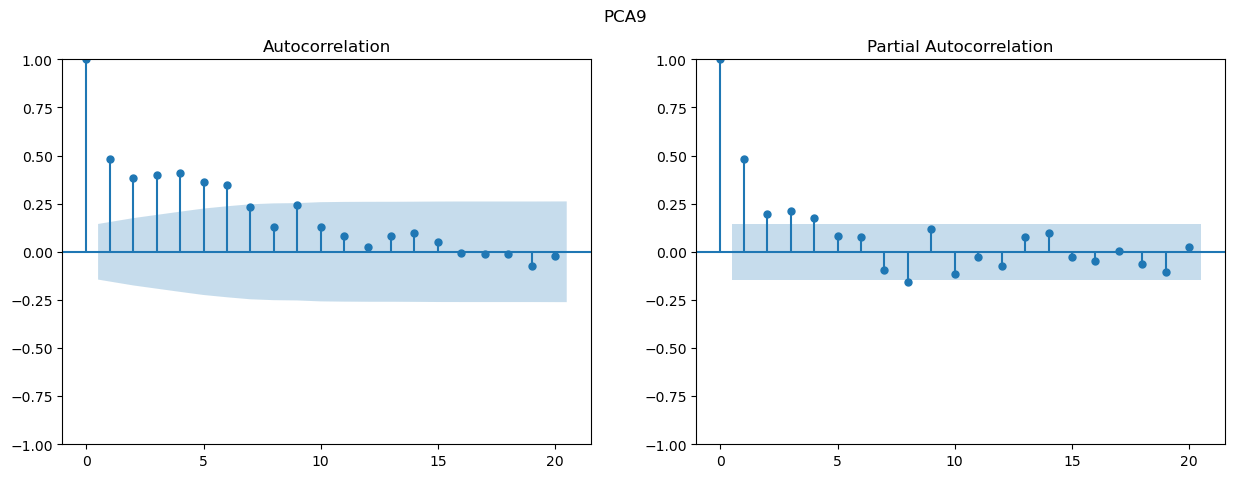

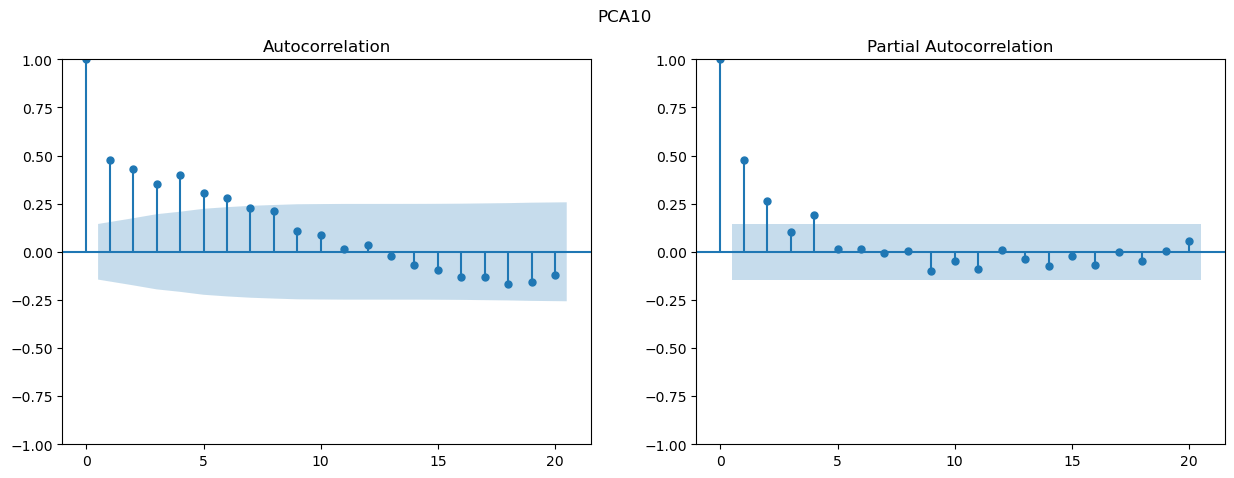

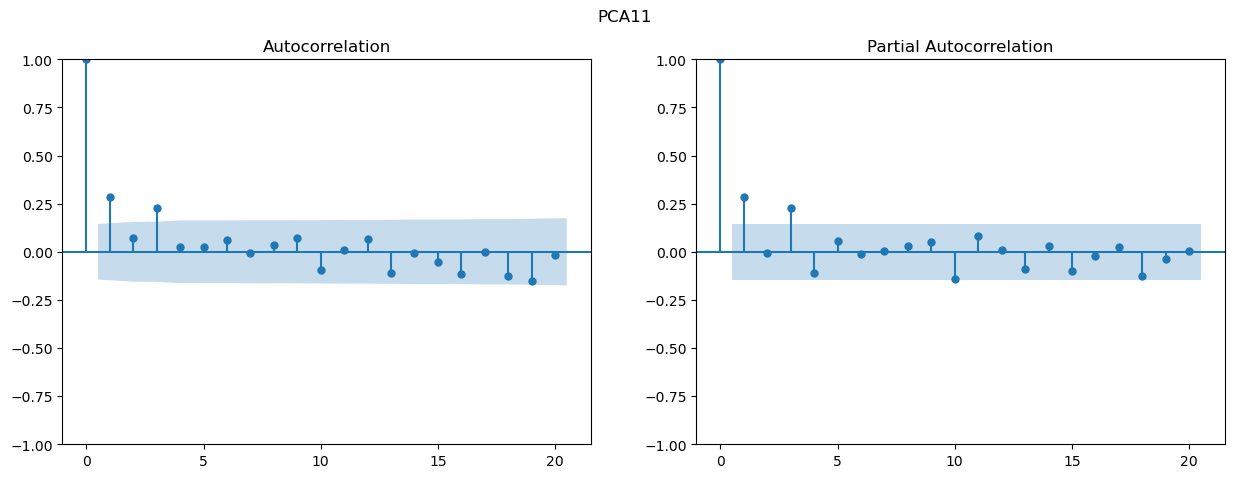

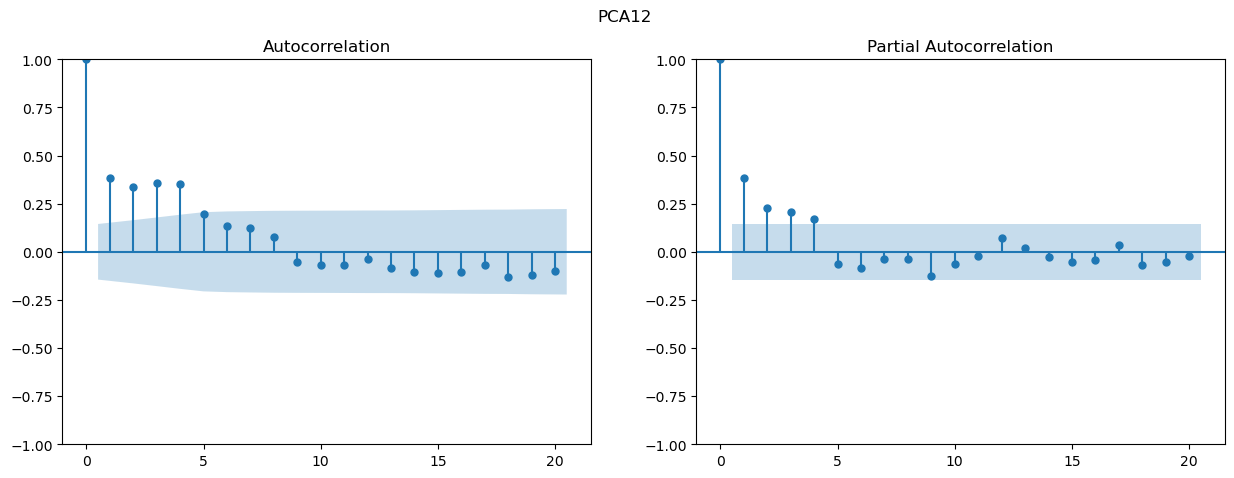

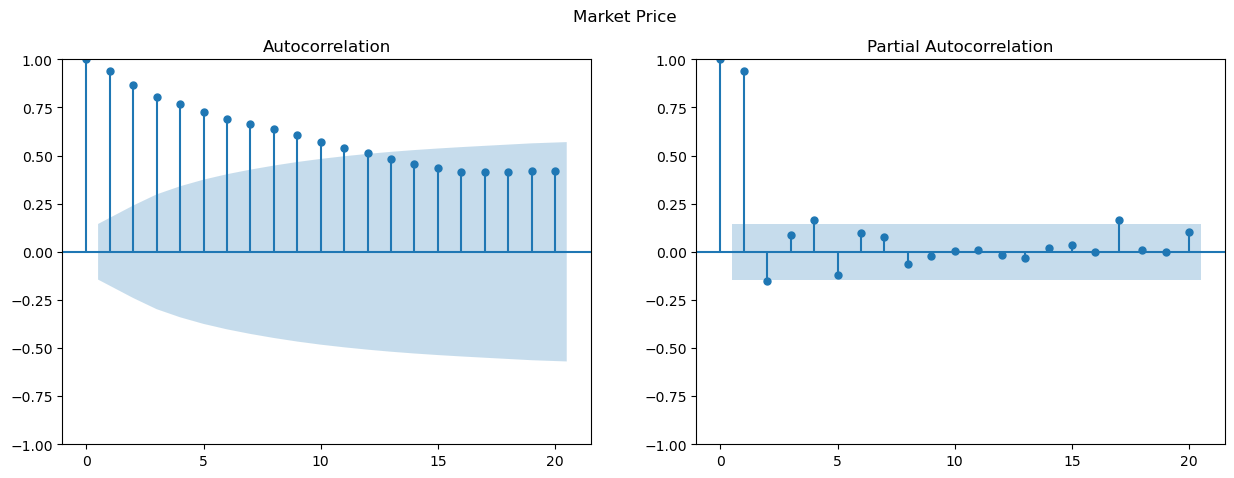

In [19]:
for col in monthly_pca_bitcoin_df.columns:
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
    plot_acf(monthly_pca_bitcoin_df[col], lags=20, alpha=0.05, ax=ax1)
    plot_pacf(monthly_pca_bitcoin_df[col], lags=20, alpha=0.05, ax=ax2)
    plt.suptitle(col)

In [20]:
for col in monthly_pca_bitcoin_df.columns:
    results = adfuller(monthly_pca_bitcoin_df[col])
    print(f'{col}: {results[1]}')

PCA1: 0.9944748550606024
PCA2: 0.651785977197969
PCA3: 0.0013995197695529913
PCA4: 0.004092780530273418
PCA5: 9.140132376771998e-05
PCA6: 0.7336435104690966
PCA7: 7.825905735425065e-07
PCA8: 2.4753876513905253e-20
PCA9: 0.039547677021059796


PCA10: 0.012464863379960828
PCA11: 1.1540659673330123e-05
PCA12: 0.0015688317695837963
Market Price: 0.9193719866523258


As per the adfuller test: PCA's _1, 2, 6_ and _Market Price_ are non-stationary whilst the rest are comfortably below our p-values indicating their usefulness for modeling.

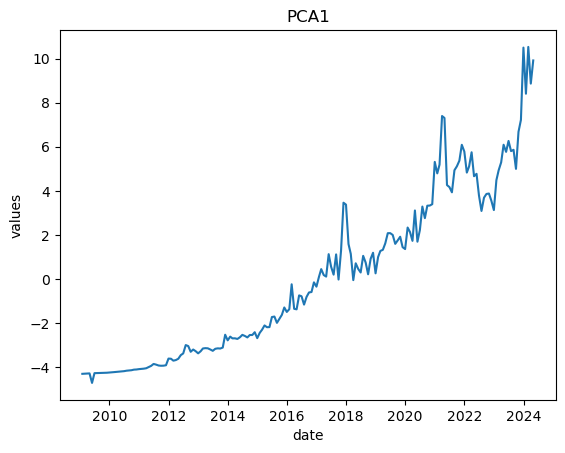

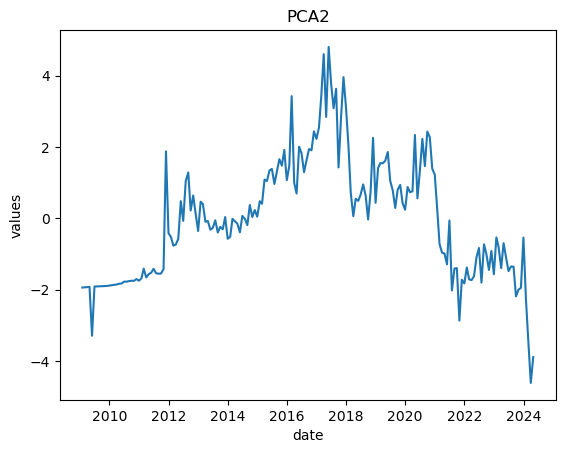

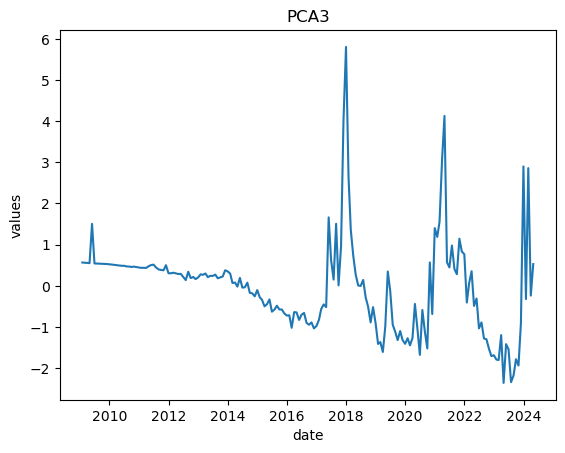

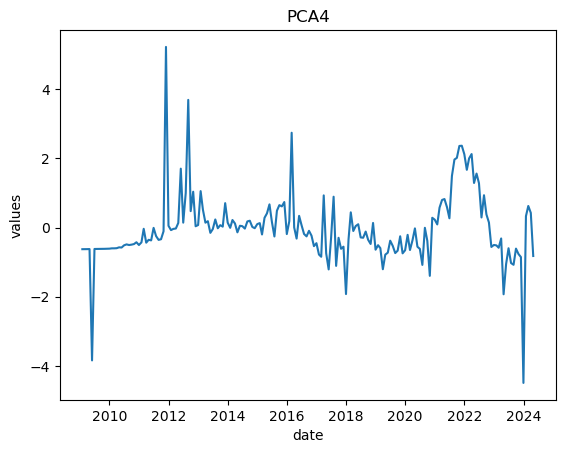

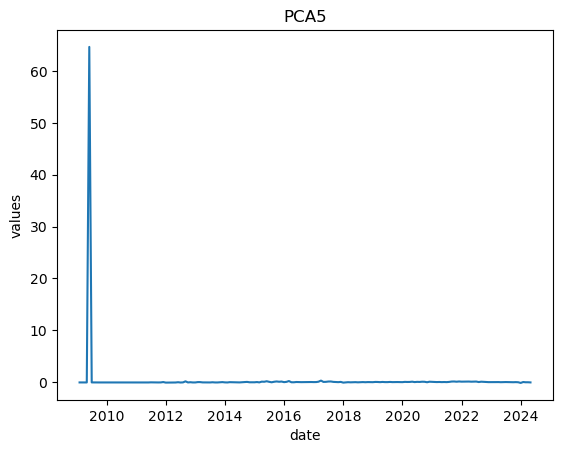

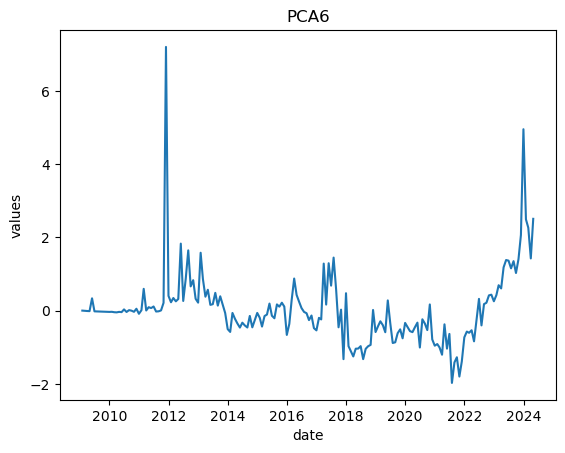

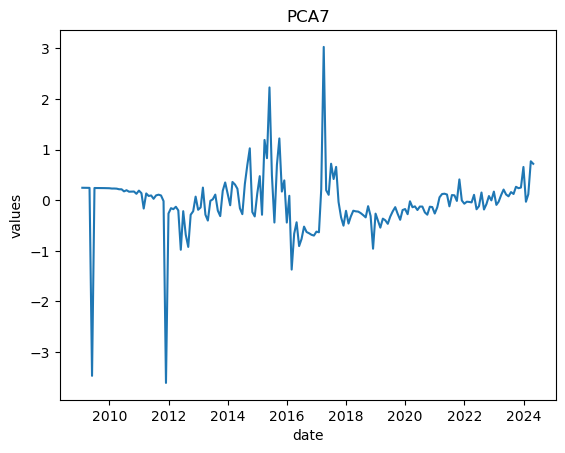

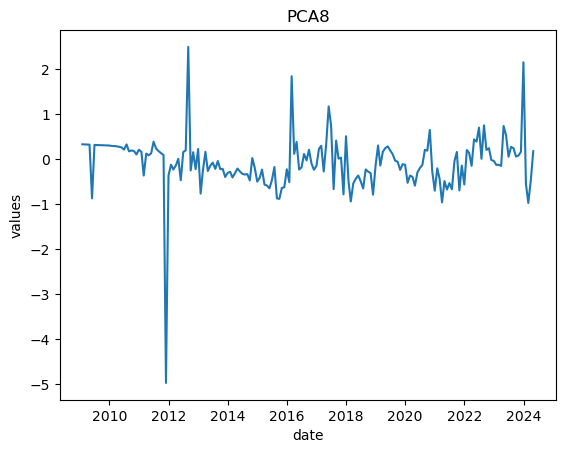

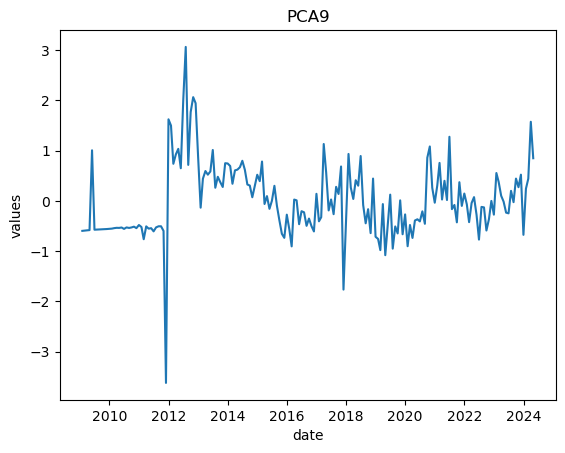

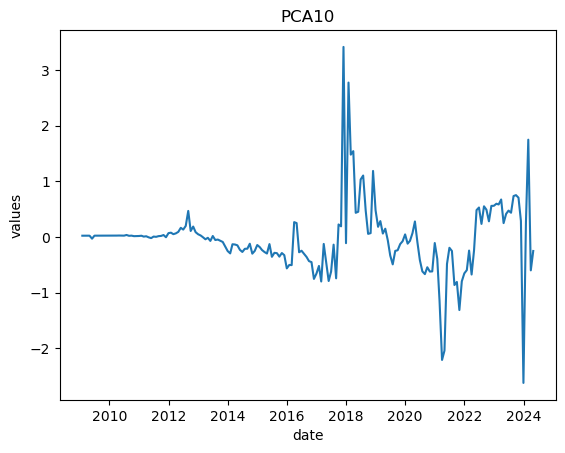

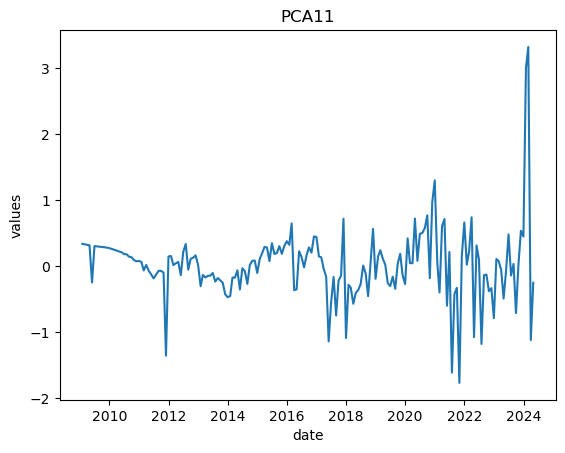

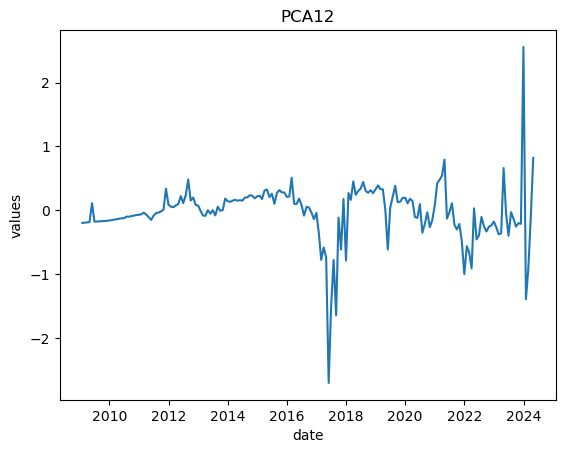

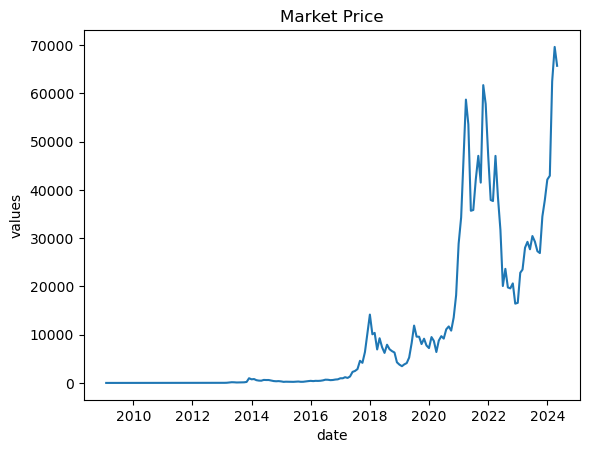

In [21]:
for feature in monthly_pca_bitcoin_df.columns:
    sns.lineplot(monthly_pca_bitcoin_df[feature])
    plt.title(feature)
    plt.xlabel('date')
    plt.ylabel('values')
    plt.show()
    plt.close()

/home/mvanslyke/mambaforge/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


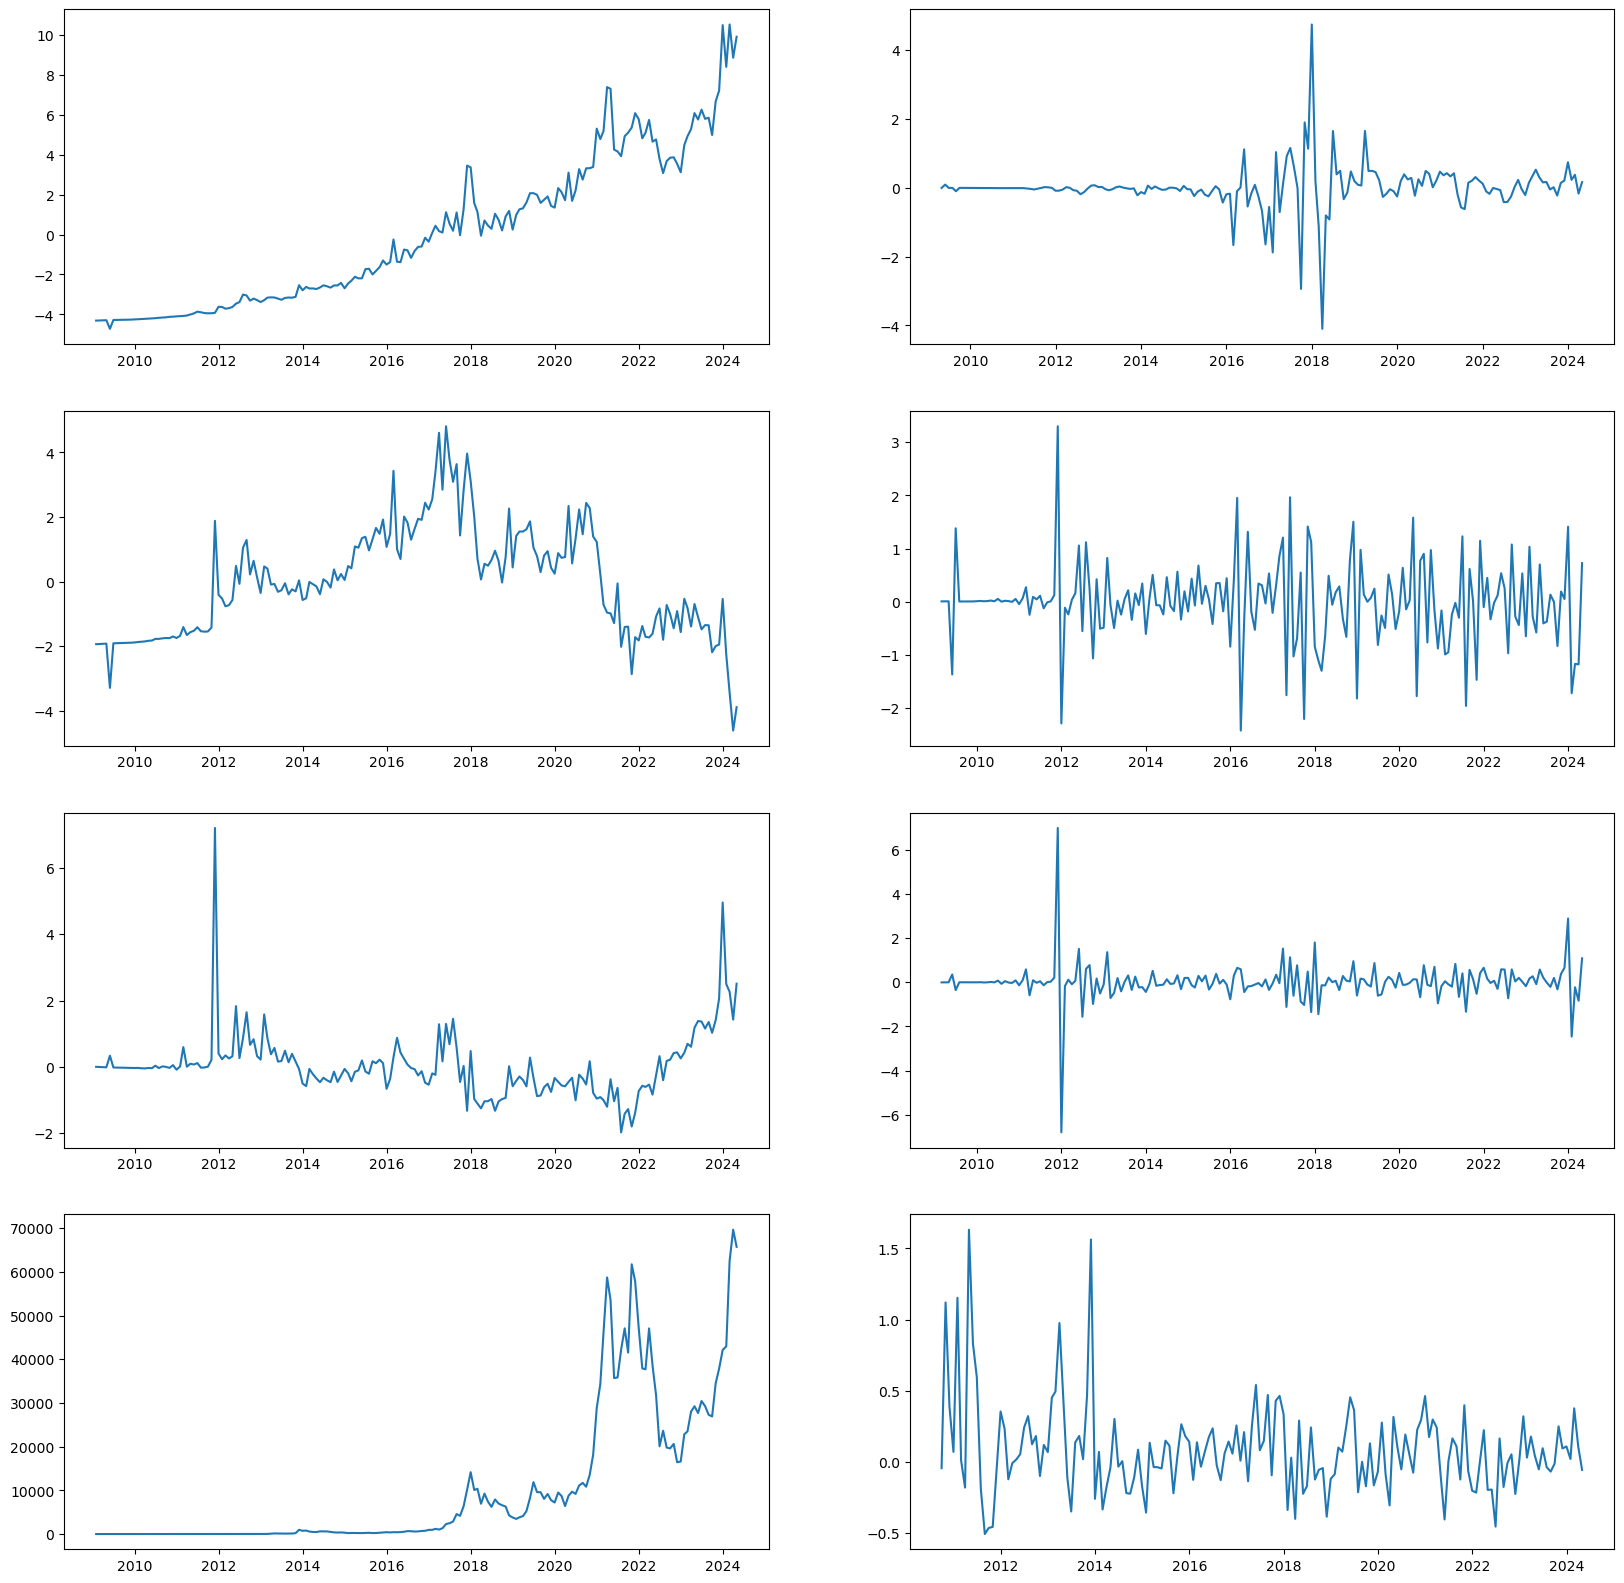

In [22]:
fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(20,20))

ax[0][0].plot(monthly_pca_bitcoin_df['PCA1'])
ax[0][1].plot(np.log(abs(monthly_pca_bitcoin_df['PCA1'])).diff(3))

ax[1][0].plot(monthly_pca_bitcoin_df['PCA2'])
ax[1][1].plot(monthly_pca_bitcoin_df['PCA2'].diff())

ax[2][0].plot(monthly_pca_bitcoin_df['PCA6'])
ax[2][1].plot(monthly_pca_bitcoin_df['PCA6'].diff())

ax[3][0].plot(monthly_pca_bitcoin_df['Market Price'])
ax[3][1].plot(np.log(abs(monthly_pca_bitcoin_df['Market Price'])).diff())

In [23]:
np.log(abs(monthly_pca_bitcoin_df['PCA1'])).diff()

date
2009-01-31         NaN
2009-02-28   -0.001500
2009-03-31   -0.001579
2009-04-30   -0.001569
2009-05-31    0.096101
                ...   
2023-12-31    0.374701
2024-01-31   -0.222413
2024-02-29    0.225337
2024-03-31   -0.172171
2024-04-30    0.112092
Freq: ME, Name: PCA1, Length: 184, dtype: float64

That should take care of our Transformations necessary for our Models so let's save these transforms into our *monthly_pca_bitcoin_df* and proceed to our preprocessing phase.

In [24]:
for pc in ['PCA1', 'PCA2', 'PCA6', 'Market Price']:
    if pc == 'PCA1':
        monthly_pca_bitcoin_df[f'{pc}_stationary'] = np.log(abs(monthly_pca_bitcoin_df['PCA1'])).diff(3)
    elif pc == 'Market Price':
       monthly_pca_bitcoin_df[f'{pc}_stationary'] = np.log(abs(monthly_pca_bitcoin_df['Market Price'])).diff()
    else:
        monthly_pca_bitcoin_df[f'{pc}_stationary'] = monthly_pca_bitcoin_df[pc].diff()

/tmp/ipykernel_3375/37240690.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_pca_bitcoin_df[f'{pc}_stationary'] = np.log(abs(monthly_pca_bitcoin_df['PCA1'])).diff(3)
/tmp/ipykernel_3375/37240690.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_pca_bitcoin_df[f'{pc}_stationary'] = monthly_pca_bitcoin_df[pc].diff()
/tmp/ipykernel_3375/37240690.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [25]:
monthly_pca_bitcoin_df.dropna(inplace=True)

/tmp/ipykernel_3375/1539485645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_pca_bitcoin_df.dropna(inplace=True)


In [26]:
monthly_pca_bitcoin_df.drop(index='2010-08-31', inplace=True)

/tmp/ipykernel_3375/96756979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_pca_bitcoin_df.drop(index='2010-08-31', inplace=True)


In [27]:
for col in monthly_pca_bitcoin_df.columns:
    if col == 'PCA1' or col == 'PCA2' or col == 'PCA6' or col == 'Market Price':
        continue
    else:
        results = adfuller(monthly_pca_bitcoin_df[col])
        print(f'{col}: {results[1]}')

PCA3: 0.002488757128967057
PCA4: 0.0031903743858386685
PCA5: 0.052408969264780565
PCA7: 0.0009089811213774929
PCA8: 3.3716112433151263e-05
PCA9: 0.025955209065977983
PCA10: 0.022185681586967387
PCA11: 3.045610733674053e-05
PCA12: 0.0033321345950459314
PCA1_stationary: 6.273045700179846e-07
PCA2_stationary: 9.797937885315451e-25
PCA6_stationary: 1.209875369834199e-15
Market Price_stationary: 2.446506687284011e-06


All of our features are now sufficiently stationary for the Analysis.

***
##### Pre-Processing
***
- Separate into _X_ and _y_ and create _train_, _test_ and/or _validate_ data sets


In [28]:
X_prime = monthly_pca_bitcoin_df[['PCA1_stationary', 'PCA2_stationary', 'PCA3', 'PCA4', 'PCA5', 'PCA6_stationary', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11', 'PCA12', 'Market Price_stationary']].rename(columns={'PCA1_stationary': 'PCA1',
                                                                                                                                                                                                                'PCA2_stationary': 'PCA2',
                                                                                                                                                                                                                'PCA6_stationary': 'PCA6',
                                                                                                                                                                                                                'Market Price_stationary': 'Market Price'})

In [29]:
X_prime.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,Market Price
date,,,,,,,,,,,,,
2010-09-30,-0.010319,0.010471,0.457342,-0.493387,-0.087789,-0.014372,0.169396,0.196478,-0.528685,0.025425,0.136106,-0.089705,-0.045713
2010-10-31,-0.011720,-0.004247,0.466204,-0.476186,-0.088233,-0.031368,0.171458,0.183535,-0.512908,0.015964,0.093078,-0.083149,1.119890
2010-11-30,-0.010678,0.051437,0.454114,-0.423881,-0.088609,0.083576,0.126553,0.108282,-0.542487,0.017146,0.074371,-0.073406,0.387766
2010-12-31,-0.011909,-0.046599,0.445535,-0.503403,-0.089173,-0.137684,0.189747,0.212922,-0.480426,0.018838,0.080851,-0.069971,0.068993
2011-01-31,-0.007835,0.065953,0.435146,-0.427536,-0.087742,0.097656,0.138537,0.162758,-0.519869,0.023465,0.063826,-0.061376,1.152680


- ##### ARIMA MODELS #####
***

In [30]:
# Univariate Model data
X_univar = X_prime['Market Price']

X_train = X_univar[:int(len(X_univar) * 0.8)]
X_test = X_univar[int(len(X_univar) * 0.8):]

In [31]:
def ARIMA_model_selector(X, pval=3, dval=3, qval=3):
    '''Takes a univarate dataset and p, d, q parameters for an ARIMA model
    and fits, measures, and visualizes the resultant data. selects the best scores
    from both the AIC and BIC metrics and takes their full diagnostic for suitability
    returns metrics_df for further diagnostics if the lowest AIC/BIC scores are not suitable'''
    # Test Models
    model_metrics = {'AIC': {}, 'BIC': {}, 'pdq': {}}
    best_models = {'AIC': None, 'BIC': None}

    for d in range(dval):
        for p in range(pval):
            for q in range(qval):
                try:
                    model = ARIMA(X, order=(p,d,q))
                    results = model.fit()

                    model_metrics['AIC'][f'ARIMA({p},{d},{q})'] = results.aic
                    model_metrics['BIC'][f'ARIMA({p},{d},{q})'] = results.bic
                    model_metrics['pdq'][f'ARIMA({p},{d},{q})'] = (p,d,q)

                    if best_models['AIC'] == None and best_models['BIC'] == None:
                        best_models['AIC'] = [model, results]
                        best_models['BIC'] = [model, results]

                    elif best_models['AIC'][1].aic > results.aic and best_models['BIC'][1].bic > results.bic:
                        best_models['AIC'] = [model, results]
                        best_models['BIC'] = [model, results]
                        print('\nUpdated ARIMA aic and bic selection:')
                        print(f'order: ({p}, {d}, {q}) aic-score: {results.aic} bic-score:{results.bic}')

                    elif best_models['AIC'][1].aic > results.aic and best_models['BIC'][1].bic < results.bic:
                        best_models['AIC'] = [model, results]
                        print('\nUpdated ARIMA aic selection:')
                        print(f'order: ({p}, {d}, {q}) score: {results.aic}')

                    elif best_models['BIC'][1].bic > results.bic and best_models['AIC'][1].aic < results.aic:
                        best_models['BIC'] = [model, results]
                        print('\nUpdated ARIMA bic selection:')
                        print(f'order: ({p}, {d}, {q}) score: {results.bic}')

                    else:
                        print(p, d, q, results.aic, results.bic)

                except:
                    print(p, d, q, None, None)
    # Visualize AIC vs BIC scores            
    metrics_df = pd.DataFrame(model_metrics)

    plt.plot(metrics_df['AIC'], label='AIC')
    plt.plot(metrics_df['BIC'], label='BIC')
    plt.legend()
    plt.title('Model Fit Metrics')
    plt.xlabel('Models')
    plt.xticks(rotation=90)
    plt.ylabel('Scores')
    plt.show()

    # Select lowest scores from AIC and BIC and then pull their Summary and visualize their full metrics.
    for key in best_models:
        best_models[key][1].plot_diagnostics()
        print(best_models[key][1].summary())
    
    return metrics_df, best_models


Updated ARIMA aic and bic selection:
order: (0, 0, 1) aic-score: 86.28826609879088 bic-score:95.58786538226349


0 0 2 88.28776770922498 100.68723342052178
1 0 0 86.31163868358466 95.61123796705726
1 0 1 88.28462642004953 100.68409213134633
1 0 2 90.05895386914115 105.55828600826214
2 0 0 88.3056850543197 100.7051507656165


/home/mvanslyke/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/mvanslyke/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2 0 1 89.92820187606928 105.42753401519028
2 0 2 91.5750899229253 110.17428848987049
0 1 0 161.3891252107116 164.48287541151836
0 1 1 95.76341732611529 101.95091772772881
0 1 2 90.3934220768616 99.67467267928188
1 1 0 137.3211612002924 143.50866160190594
1 1 1 90.5510839540747 99.83233455649498
1 1 2 92.35210782292071 104.72710862614777
2 1 0 120.2523091676938 129.5335597701141
2 1 1 92.51899055228748 104.89399135551453
2 1 2 94.0844540874686 109.5532050915024
0 2 0 322.0260476686599 325.11364400389226


/home/mvanslyke/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


0 2 1 168.50572395468552 174.6809166251503
0 2 2 107.85452526151975 117.1173142672169
1 2 0 257.74553561774275 263.9207282882075
1 2 1 145.25287775140936 154.51566675710652


/home/mvanslyke/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1 2 2 101.78454598572287 114.1349313266524
2 2 0 204.8530803017823 214.11586930747947
2 2 1 128.85937887007518 141.2097642110047
2 2 2 103.7777805289126 119.21576220507453


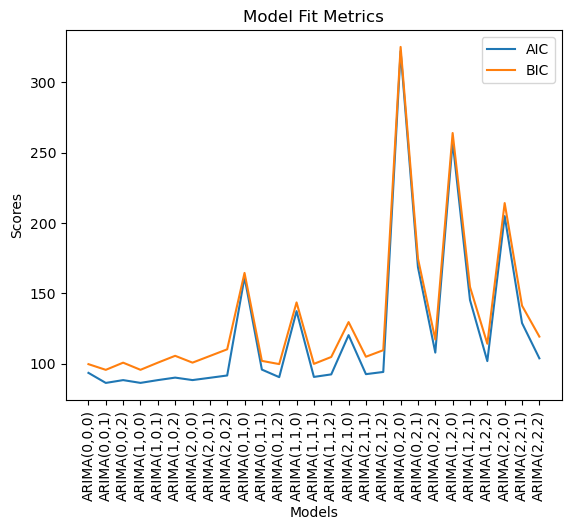

                               SARIMAX Results                                
Dep. Variable:           Market Price   No. Observations:                  164
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 -40.144
Date:                Wed, 24 Apr 2024   AIC                             86.288
Time:                        07:06:07   BIC                             95.588
Sample:                    09-30-2010   HQIC                            90.064
                         - 04-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0836      0.039      2.163      0.031       0.008       0.159
ma.L1          0.2395      0.067      3.548      0.000       0.107       0.372
sigma2         0.0955      0.006     14.959      0.0

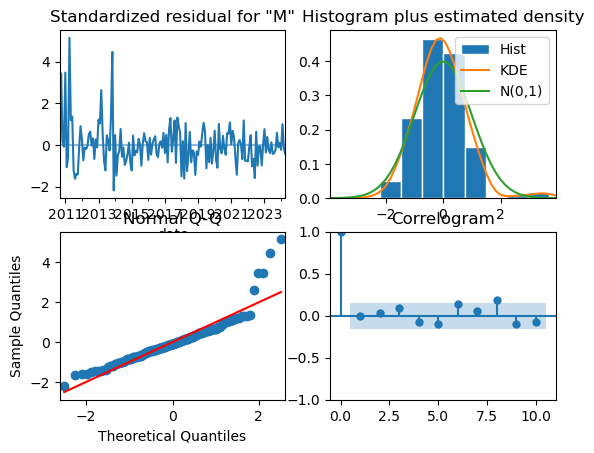

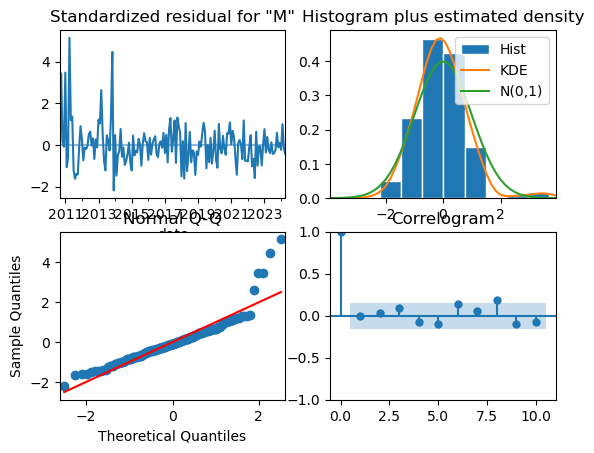

In [32]:
metrics_df, best_models = ARIMA_model_selector(X_univar)

These results concur from both the AIC and BIC scores that an ARIMA(0,0,1) or MA model would work best for this univariate series. the summary in the Prob(Q) confirms that residuals are definitely uncorrelated, our theoretical quantiles are reasonabley close to the linear regression and almost all points fall within the confidence area of the correlogram.  So without very little doubt as to the this being the best univariate ARIMA (MA) Model we could do.

In [33]:
def convert_stationary_predictions_to_original_predictions(stationary_predictions, original_data):
  """Converts stationary predictions to original predictions.

  Args:
    stationary_predictions: A NumPy array of stationary predictions.
    original_data: A NumPy array of original data.

  Returns:
    A NumPy array of original predictions.
  """

  # Calculate the cumulative sum of the stationary predictions.
  cumulative_sum = np.cumsum(stationary_predictions)

  # Add the first value of the original data to the cumulative sum.
  try:
    cumulative_sum += original_data.iloc[0]
  except:
    cumulative_sum += original_data[0]

  # Calculate the original predictions by taking the exponential of the cumulative sum.
  original_predictions = np.exp(cumulative_sum)

  return original_predictions

In [34]:
ARIMA_model, ARIMA_results = best_models['AIC']

In [35]:
ARIMA_predictions = ARIMA_results.get_prediction(start=0)
ARIMA_predictions_orig = convert_stationary_predictions_to_original_predictions(ARIMA_predictions.predicted_mean[-len(X_test):], X_test)

In [36]:
ARIMA_predictionsci = ARIMA_predictions.conf_int()

In [37]:
lower_ci = ARIMA_predictionsci['lower Market Price']
upper_ci = ARIMA_predictionsci['upper Market Price']

In [38]:
rmse = np.sqrt(mean_squared_error(X_test, ARIMA_predictions.predicted_mean[-len(X_test):]))
print('RMSE:', rmse)

RMSE: 0.19657976269930047


In [39]:
ARIMA_predictions_orig

date
2021-08-31     1.233892
2021-09-30     1.343988
2021-10-31     1.389192
2021-11-30     1.647675
2021-12-31     1.692935
2022-01-31     1.741251
2022-02-28     1.784924
2022-03-31     1.926471
2022-04-30     2.168671
2022-05-31     2.185529
2022-06-30     2.262763
2022-07-31     2.186903
2022-08-31     2.492657
2022-09-30     2.516832
2022-10-31     2.723536
2022-11-30     2.941422
2022-12-31     2.973116
2023-01-31     3.231889
2023-02-28     3.717547
2023-03-31     3.935271
2023-04-30     4.402686
2023-05-31     4.707103
2023-06-30     4.971414
2023-07-31     5.456727
2023-08-31     5.747290
2023-09-30     6.068984
2023-10-31     6.490615
2023-11-30     7.369273
2023-12-31     7.947144
2024-01-31     8.705760
2024-02-29     9.302378
2024-03-31    10.889744
2024-04-30    11.700603
Freq: ME, Name: predicted_mean, dtype: float64

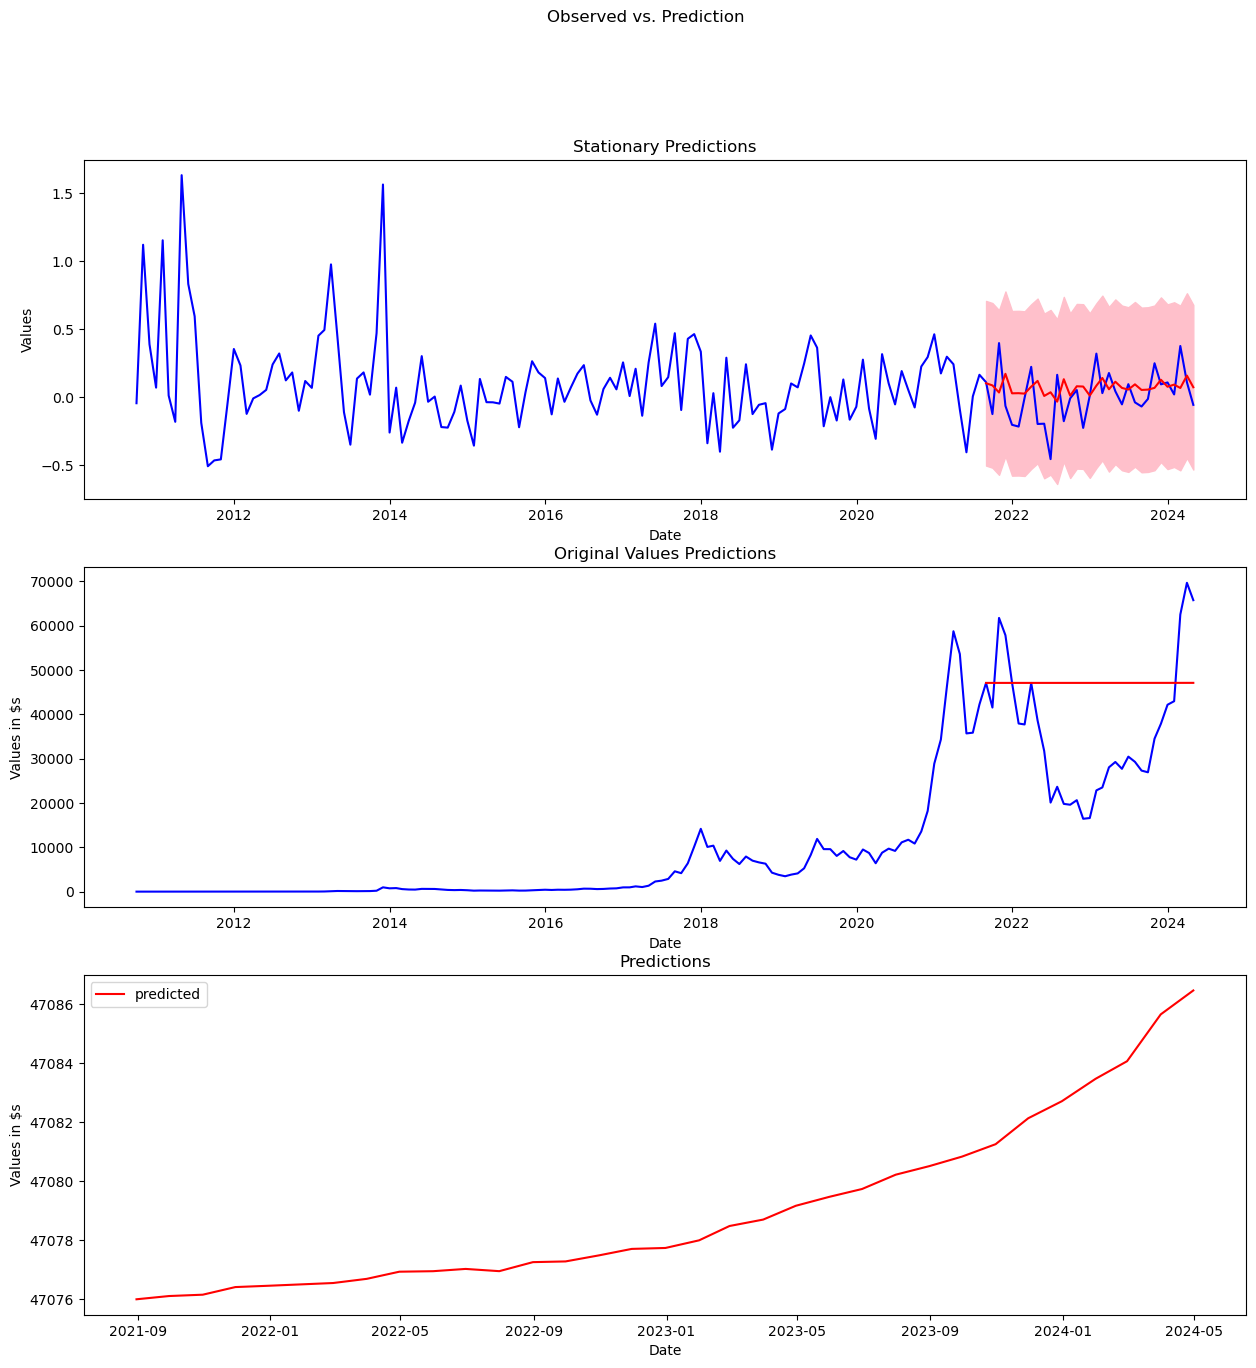

In [40]:
_, (ax1,ax2,ax3) = plt.subplots(nrows=3, figsize=(15,15))
ax1.plot(X_prime['Market Price'], label='observed', color='blue')
ax1.plot(ARIMA_predictions.predicted_mean[-len(X_test):], label='predicted', color='red')
ax1.fill_between(ARIMA_predictionsci.index[-len(X_test):], lower_ci[-len(X_test):], upper_ci[-len(X_test):], color='pink')
ax1.set_xlabel('Date')
ax1.set_ylabel('Values')
ax1.set_title('Stationary Predictions')

ax2.plot(monthly_pca_bitcoin_df['Market Price'], label='observed', color='blue')
ax2.plot((ARIMA_predictions_orig[-len(X_test):] + monthly_pca_bitcoin_df['Market Price'].iloc[int(len(X_univar) * 0.8)]), label='predicted', color='red')
ax2.set_xlabel('Date')
ax2.set_ylabel('Values in $s')
ax2.set_title('Original Values Predictions')

ax3.plot((ARIMA_predictions_orig[-len(X_test):] + monthly_pca_bitcoin_df['Market Price'].iloc[int(len(X_univar) * 0.8)]), color='red', label='predicted')
ax3.set_xlabel('Date')
ax3.set_ylabel('Values in $s')
ax3.set_title('Predictions')

plt.suptitle('Observed vs. Prediction')
plt.legend()
plt.show()

So interesting results here from the model predictions.  When left visually with the stationary time-series, the line seems to move to predict what the next value problably is, when including the area included within the Confidence interval range, the true values all fall within this confidence interval, which is a good thing.  However when we return the Time series to their original values and transform the predictions to match, it looks just like a straight line. and when we look closer it appears to be a very low exponential curve happening here.  There is a very broad degree of variability happening which a simple univariate model won't be able to capture it seems so thus, we will try an LSTM model next and see if it performs any better.

- ##### LSTM MODELS #####
***

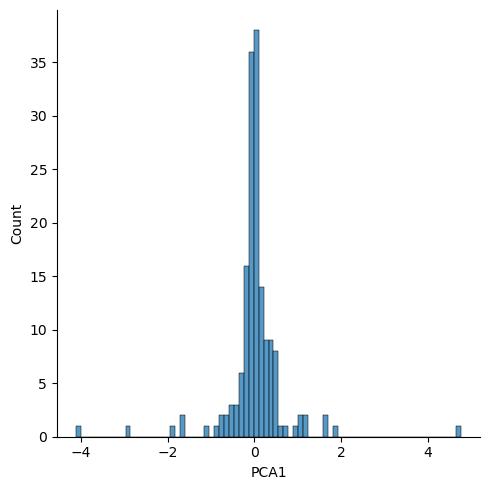

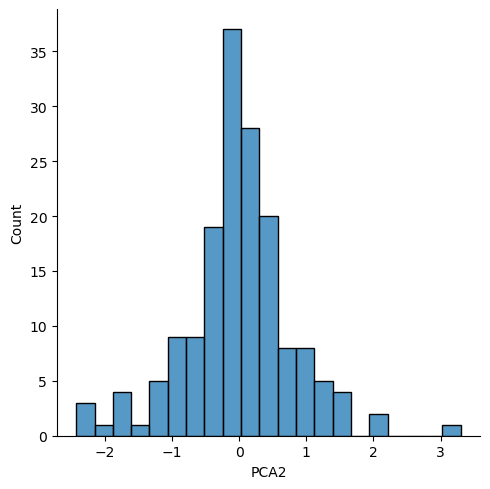

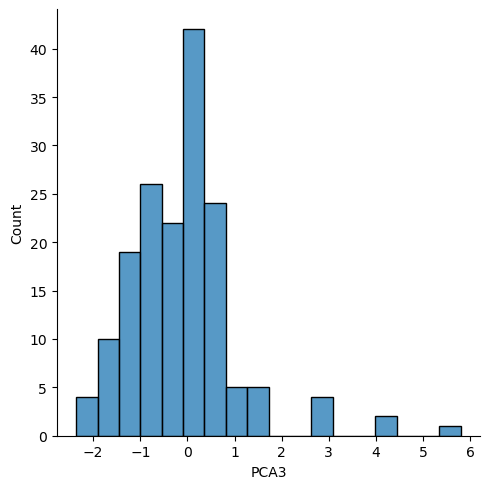

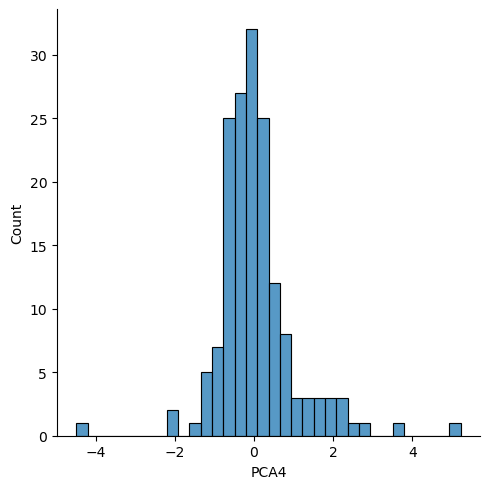

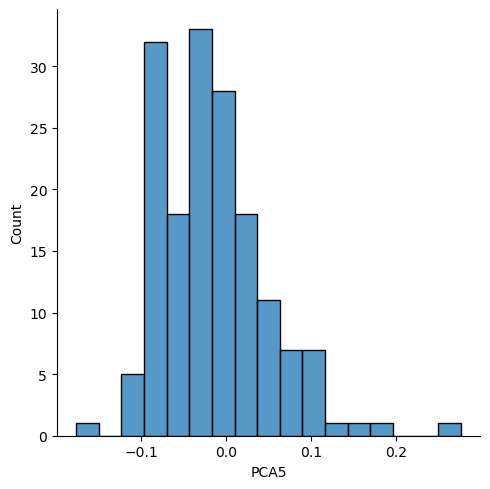

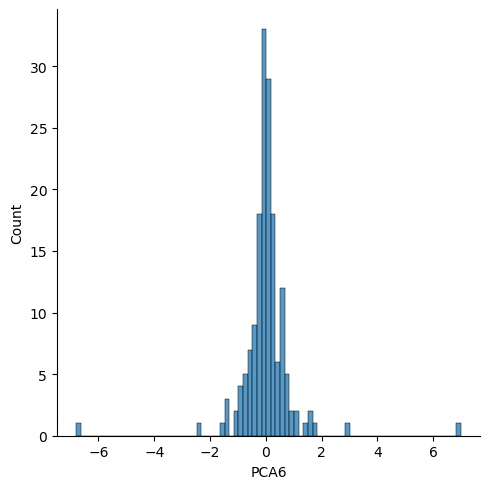

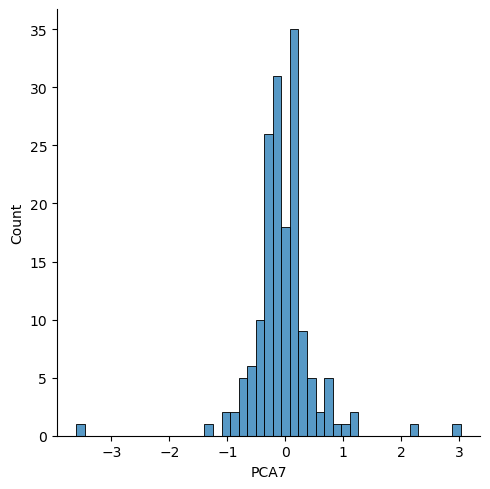

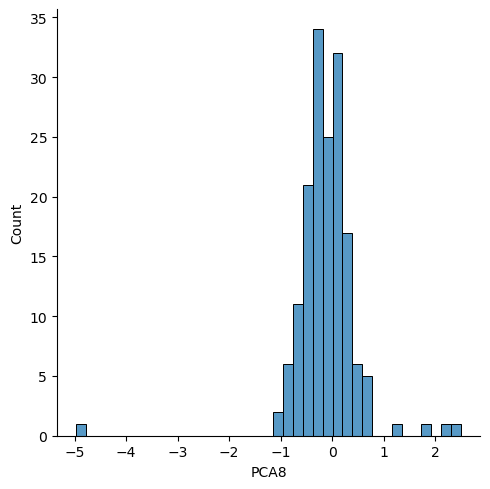

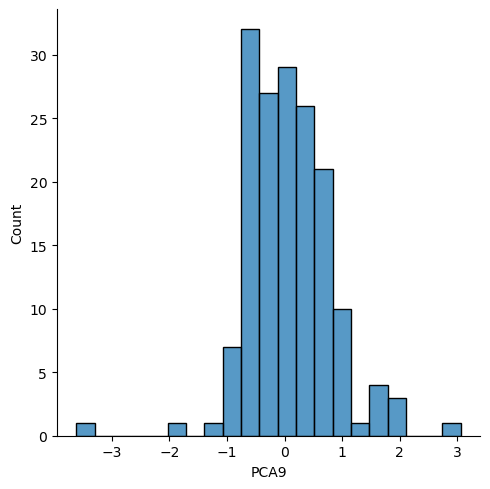

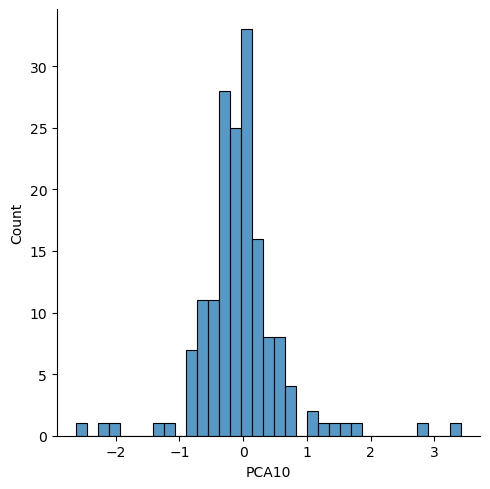

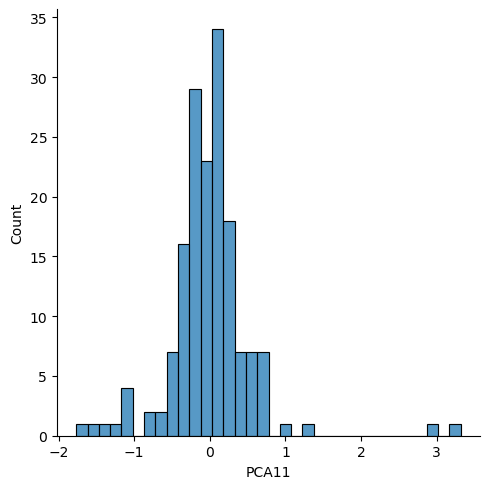

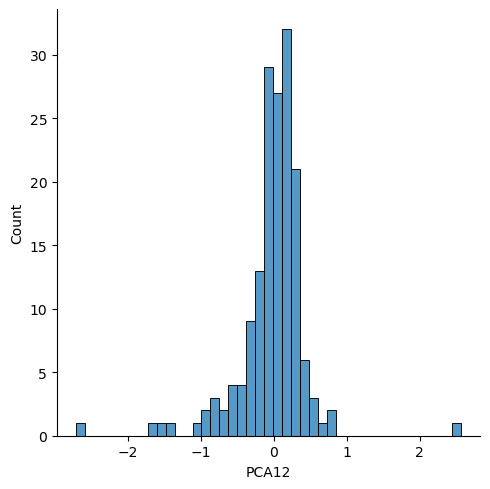

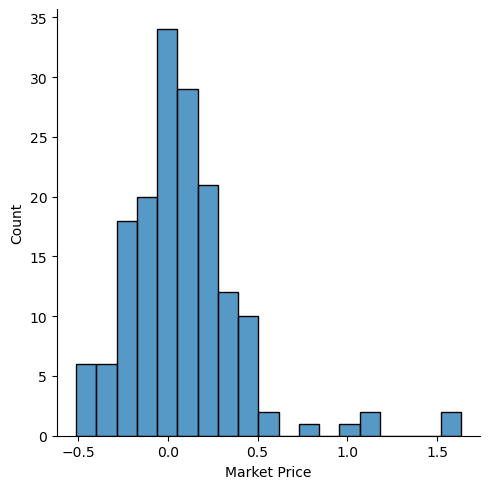

In [41]:
for col in X_prime.columns:
    sns.displot(X_prime[col])

Good news! data is fairly normally distributed with a few outliers, so without further ado, we are good to continue creating our LSTM

In [42]:
LSTM_train_df = X_prime.iloc[:int(len(X_prime) * 0.80)]
LSTM_test_df = X_prime.iloc[int(len(X_prime) * 0.80):]

In [43]:
# Separate values into dependant and independant Values, scale them
scaler = MinMaxScaler(feature_range=(0,1))
LSTM_X_prime = scaler.fit_transform(X_prime)


In [44]:
# Divide Data into Train and Test data
LSTM_X_train_size = int(len(LSTM_X_prime) * 0.80)
LSTM_X_test_size = len(LSTM_X_prime) - LSTM_X_train_size

LSTM_train, LSTM_test = LSTM_X_prime[0:LSTM_X_train_size, :], LSTM_X_prime[LSTM_X_train_size:len(LSTM_X_prime),:]
LSTM_X_train, LSTM_y_train = LSTM_train[:, :-1], LSTM_train[:, -1]
LSTM_X_test, LSTM_y_test = LSTM_test[:, :-1], LSTM_test[:, -1]

In [45]:
print(LSTM_X_train.shape, LSTM_y_train.shape, LSTM_X_test.shape, LSTM_y_test.shape)

(131, 12) (131,) (33, 12) (33,)


In [46]:
# Convert X data into correct dimension for LSTM Model
LSTM_X_train = LSTM_X_train.reshape((LSTM_X_train.shape[0], 1, LSTM_X_train.shape[1]))
LSTM_X_test = LSTM_X_test.reshape((LSTM_X_test.shape[0], 1, LSTM_X_test.shape[1]))


In [47]:
print(LSTM_X_train.shape, LSTM_y_train.shape, LSTM_X_test.shape, LSTM_y_test.shape)

(131, 1, 12) (131,) (33, 1, 12) (33,)


Now we can proceed to build the Multivariate LSTM Model

In [48]:
model = Sequential()
model.add(LSTM(250, input_shape=(LSTM_X_train.shape[1], LSTM_X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [49]:
history = model.fit(LSTM_X_train,
                    LSTM_y_train,
                    epochs=250,
                    batch_size=72,
                    validation_data=(LSTM_X_test, LSTM_y_test),
                    verbose=2,
                    shuffle=False)

Epoch 1/250
2/2 - 12s - loss: 0.3145 - val_loss: 0.2124 - 12s/epoch - 6s/step
Epoch 2/250
2/2 - 0s - loss: 0.2356 - val_loss: 0.1380 - 148ms/epoch - 74ms/step
Epoch 3/250
2/2 - 0s - loss: 0.1719 - val_loss: 0.0831 - 139ms/epoch - 69ms/step
Epoch 4/250
2/2 - 0s - loss: 0.1256 - val_loss: 0.0688 - 132ms/epoch - 66ms/step
Epoch 5/250
2/2 - 0s - loss: 0.1097 - val_loss: 0.0980 - 145ms/epoch - 73ms/step
Epoch 6/250
2/2 - 0s - loss: 0.1217 - val_loss: 0.1234 - 140ms/epoch - 70ms/step
Epoch 7/250
2/2 - 0s - loss: 0.1399 - val_loss: 0.1299 - 136ms/epoch - 68ms/step
Epoch 8/250
2/2 - 0s - loss: 0.1389 - val_loss: 0.1186 - 133ms/epoch - 67ms/step
Epoch 9/250
2/2 - 0s - loss: 0.1312 - val_loss: 0.1003 - 144ms/epoch - 72ms/step
Epoch 10/250
2/2 - 0s - loss: 0.1214 - val_loss: 0.0831 - 144ms/epoch - 72ms/step
Epoch 11/250
2/2 - 0s - loss: 0.1132 - val_loss: 0.0701 - 141ms/epoch - 70ms/step
Epoch 12/250
2/2 - 0s - loss: 0.1114 - val_loss: 0.0673 - 136ms/epoch - 68ms/step
Epoch 13/250
2/2 - 0s - loss

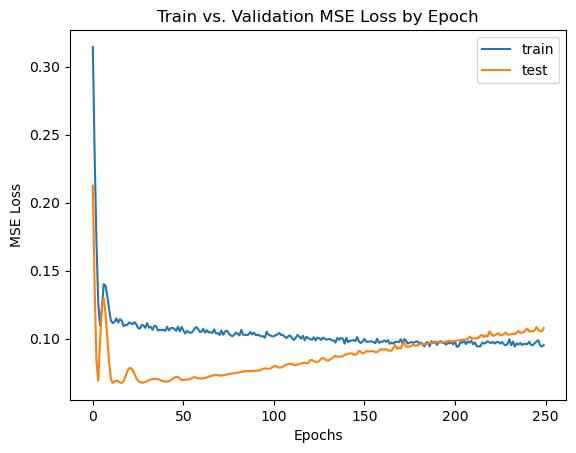

In [50]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Train vs. Validation MAE Loss by Epoch')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

In [51]:
# Predict on Train and Test data
LSTM_train_pred = model.predict(LSTM_X_train)
LSTM_test_pred = model.predict(LSTM_X_test)

# convert from 3 dimensions to 2 dimensions
LSTM_X_train = LSTM_X_train.reshape((LSTM_X_train.shape[0], LSTM_X_train.shape[2]))
LSTM_X_test = LSTM_X_test.reshape((LSTM_X_test.shape[0], LSTM_X_test.shape[2]))

LSTM_inv_train_pred = np.concatenate((LSTM_X_train, LSTM_train_pred), axis=1)
LSTM_inv_test_pred = np.concatenate((LSTM_X_test, LSTM_test_pred), axis=1)

2/2 [==============================] - 0s 14ms/step


In [52]:
# Transform to original scale
LSTM_inv_train_pred = scaler.inverse_transform(LSTM_inv_train_pred)
LSTM_inv_test_pred = scaler.inverse_transform(LSTM_inv_test_pred)

In [53]:
# Predicted values on training data
LSTM_inv_train_pred = LSTM_inv_train_pred[:,-1]
LSTM_inv_train_pred 

array([ 8.61717495e-02,  8.04400233e-02,  7.43555834e-02,  7.76911785e-02,
        7.16352595e-02,  4.73995240e-02,  7.96563710e-02,  6.51785177e-02,
        6.86311311e-02,  7.28487020e-02,  5.97331481e-02,  5.55956524e-02,
        5.27387221e-02,  5.07014301e-02, -1.03788120e-01,  2.85188764e-01,
        1.39626515e-01,  9.43368050e-02,  1.07457718e-01,  1.20795122e-01,
        1.16534355e-01,  2.04134466e-01,  2.39274212e-01,  2.79832019e-01,
        1.68615400e-01,  1.82454565e-01,  1.49235540e-01,  1.23057007e-01,
        3.47944735e-02,  1.02313827e-01,  1.31889526e-01,  9.44998904e-02,
        9.16266898e-02,  9.38148167e-02,  6.33186034e-02,  8.06200809e-02,
        7.36051096e-02,  4.49656842e-02,  1.20168725e-02,  1.86473233e-02,
        2.02445526e-02,  8.52856028e-03,  2.60450285e-02,  4.35032748e-02,
        3.92637550e-02,  7.68162851e-02,  2.26908981e-02, -2.31054547e-02,
       -3.54111642e-02,  7.85376150e-02,  6.82223966e-02,  1.79172671e-02,
        2.22747303e-02,  

In [54]:
# Predicted values against on testing data
LSTM_inv_test_pred = LSTM_inv_test_pred[:,-1]
LSTM_inv_test_pred 

array([ 0.15327088,  0.1887012 ,  0.02010195,  0.31452807,  0.42116068,
        0.21219737,  0.26815118,  0.41228943, -0.02591259,  0.22775129,
        0.11017256, -0.1228367 ,  0.0665881 ,  0.051811  , -0.0073568 ,
       -0.0432897 , -0.13911038,  0.04738191,  0.05607872,  0.07446329,
       -0.22814157, -0.00918213,  0.10600048, -0.08122659, -0.05029274,
       -0.11421318, -0.02496129,  0.11390125, -0.13375019,  0.7476804 ,
        0.82278584, -0.07129226, -0.10050545])

In [55]:
# Scale back original train and test labels:
#   Train set:
LSTM_y_train = LSTM_y_train.reshape((len(LSTM_y_train), 1))
LSTM_inv_y_train = np.concatenate((LSTM_X_train, LSTM_y_train), axis=1)
LSTM_inv_y_train = scaler.inverse_transform(LSTM_inv_y_train)
LSTM_inv_y_train = LSTM_inv_y_train[:,-1]

#   Test set:
LSTM_y_test = LSTM_y_test.reshape((len(LSTM_y_test), 1))
LSTM_inv_y_test = np.concatenate((LSTM_X_test, LSTM_y_test), axis=1)
LSTM_inv_y_test = scaler.inverse_transform(LSTM_inv_y_test)
LSTM_inv_y_test = LSTM_inv_y_test[:,-1]

In [56]:
# Calculate RMSE on Train and test data:
LSTM_rmse_train = np.sqrt(mean_squared_error(LSTM_inv_y_train, LSTM_inv_train_pred))
LSTM_rmse_test = np.sqrt(mean_squared_error(LSTM_inv_y_test, LSTM_inv_test_pred))

print('Train RMSE: %.3f' % LSTM_rmse_train)
print('Test RMSE: %.3f' % LSTM_rmse_test)

Train RMSE: 0.327
Test RMSE: 0.295


In [57]:
LSTM_inv_y_test = LSTM_inv_y_test.reshape(-1,1)
LSTM_inv_y_test.shape

(33, 1)

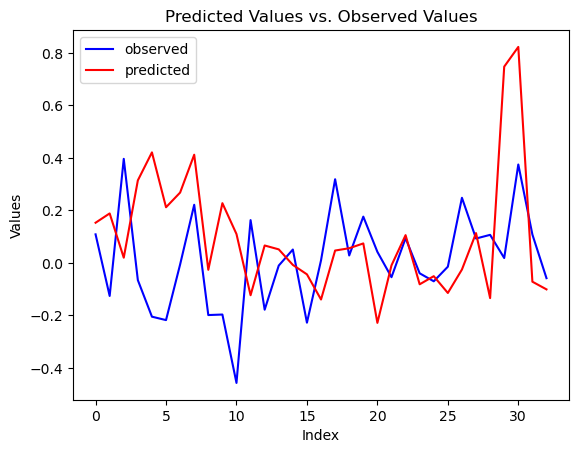

In [58]:
t = np.arange(0,33,1)
plt.plot(t, LSTM_inv_y_test, label='observed', color='b')
plt.plot(t, LSTM_inv_test_pred, label='predicted', color='r')
plt.title('Predicted Values vs. Observed Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()

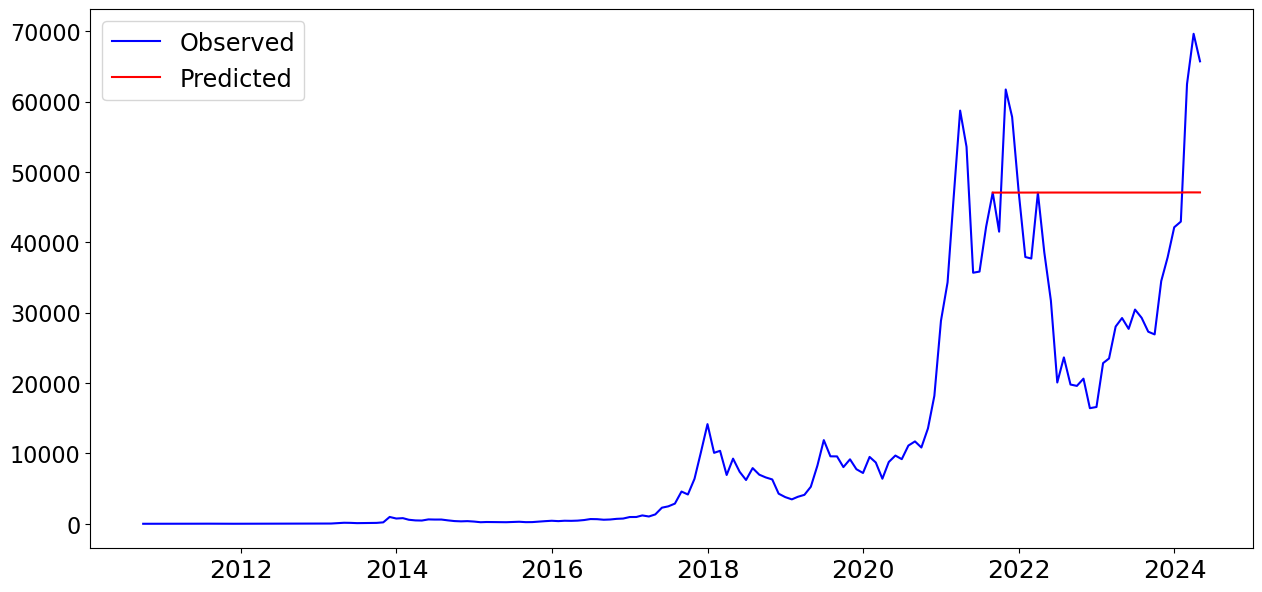

In [59]:
plt.figure(figsize=(15,7))
plt.plot(monthly_pca_bitcoin_df.index, monthly_pca_bitcoin_df['Market Price'], label='Observed', color='b')
plt.plot(LSTM_test_df.index, np.exp(np.cumsum(LSTM_inv_test_pred)) +  monthly_pca_bitcoin_df['Market Price'].iloc[-len(LSTM_inv_test_pred)], color='r', label='Predicted')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

The predictions are still exponential when converted to the orignal scale and tantamount to a straight line when this model should really be more accurately following variance of the bitcoin price especially with an RMSE of .19. So for now, let's tune this LSTM model to see if we can't get best possible result from it. using RMSE as a metric.

In [85]:
def LSTM_model_gen(X_train, num_layers, num_nodes, dropout, loss, optimizer):
    '''
    Generates a list of models to be iterated
    '''
    models = []
    params = {'num_layers': [], 'num_nodes': [], 'dropout': [], 'loss': [], 'optimizer': []}
    models_dict = {}
    # Generate list of models and dictionary of parameters
    for func in loss:
        for optim in optimizer:
            for i in num_layers:
                for j in num_nodes:
                    for drop in dropout:
                        model = Sequential()
                        if i == 1:
                            model.add(LSTM(j, input_shape=(X_train.shape[1], X_train.shape[2])))
                            model.add(Dropout(drop))
                            model.add(Dense(1))
                            model.compile(loss=func, optimizer=optim)
                            params_list = [i, j, drop, func, optim]
                            keys_list = params.keys()
                            temp_params = dict(zip(keys_list, params_list))
                            for key in temp_params.keys():
                                params[key].append(temp_params[key]) 
                            models.append(model)
                        else:
                            model.add(LSTM(j, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
                            for num in range(i-1):
                                model.add(LSTM(j, return_sequences=True))
                            model.add(Dropout(drop))
                            model.add(Dense(1))
                            model.compile(loss=func, optimizer=optim)
                            params_list = [i, j, drop, func, optim]
                            temp_params = dict(zip(keys_list, params_list))
                            for key in temp_params.keys():
                                params[key].append(temp_params[key]) 
                            models.append(model)

    # Merge models and parameters into a dictionary of tupels: {'model1: (model, {'num_layers': 1,
                                                                            #     'num_nodes': 100, 
                                                                            #     'dropout': 0.1,
                                                                            #     'loss': 'mae'
                                                                            #     'optimizer': 'adam'})} etc..

    final_params = {'num_layers': 0, 'num_nodes': 0, 'dropout': 0.0, 'loss': '', 'optimizer': ''}
    for i in range(len(models)):
        for model in models:
            for key in final_params.keys():
                final_params[key] = params[key][i]
                models_dict[f'Model{i+1}': (model, final_params)]

    return models_dict

def viz_model(history, key, inv_y_test, inv_test_pred):
    _, (ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(25, 10))
    # Plot training and Validation scores by Epoch
    ax1.plot(history.history['loss'], label='train')
    ax1.plot(history.history['val_loss'], label='test')
    ax1.set_title(f'Train vs. Validation {key[1].keys()[3].upper()} Loss by Epoch')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel(f'{key[1].keys()[3].upper()} Loss')
    ax1.legend()

    # Rough Plot of Predicted against True Values Stationary Transformation
    t = np.arange(0,33,1)
    ax2.plot(t, inv_y_test, label='observed', color='b')
    ax2.plot(t, inv_test_pred, label='predicted', color='r')
    ax2.set_title('Predicted Values vs. Observed Values')
    ax2.set_xlabel('Index')
    ax2.set_ylabel('Values')
    ax2.legend()

    # Plot of original Value data against Predicted (Transformed) Data
    ax3.plot(monthly_pca_bitcoin_df.index, monthly_pca_bitcoin_df['Market Price'], label='Observed', color='b')
    ax3.plot(LSTM_test_df.index, np.exp(np.cumsum(inv_test_pred)) +  monthly_pca_bitcoin_df['Market Price'].iloc[-len(inv_test_pred)], color='r', label='Predicted')
    ax3.set_title('Predicted Values vs. Observed Values Original Scale')
    ax3.set_xlabel('Date')
    ax3.set_ylabel('Values in $s')
    ax3.legend()
                
    plt.suptitle(f'{key} Performance Visualization')
    plt.show()

def model_metrics(key, rmse_train, rmse_test):
    # Print Model Params and RMSE metrics before Plotting
    print('#######################')
    print(f'{key} Parameters:')
    for key2 in key[1].keys():
        print(f'\t{key2}: {key[1][key2]}')
    print('#######################')
    print('\nTrain RMSE: %.3f' % rmse_train)
    print('Test RMSE: %.3f' % rmse_test)
    print('#######################')
                        

def LSTM_tuner( X_train, y_train, X_test, y_test, num_epochs, batch_size, num_layers, num_nodes, dropout, loss, optimizer, scaler, callback):
    '''
    Takes in previously formated X, and y tensors for LSTM modeling and tunes model parameters and model layers
    in order to find the best model for the dataset.
    '''
    # Instantiate Models
    models_dict = LSTM_model_gen(X_train=X_train,
                                    num_layers=num_layers,
                                    num_nodes=num_nodes,
                                    dropout=dropout,
                                    loss=loss,
                                    optimizer=optimizer)
    best_model = {'Model': None, 'History': None, 'Params': None, 'MAE': None, 'RMSE trainset score': None, 'RMSE testset score': None }

    # Train Model
    for i in num_epochs:
        for k in batch_size:
            for key in models_dict.keys():
                history = key[0].fit(X_train,
                            y_train,
                            callback=[callback],
                            epochs=i,
                            batch_size=k,
                            validation_data=(X_test, y_test),
                            verbose=2,
                            shuffle=False)
                
                # Predict on Train and Test data
                train_pred = key[0].predict(X_train)
                test_pred = key[0].predict(X_test)

                # convert from 3 dimensions to 2 dimensions
                X_train = X_train.reshape((X_train.shape[0], X_train.shape[2]))
                X_test = X_test.reshape((X_test.shape[0], X_test.shape[2]))

                # Create inverted sets
                inv_train_pred = np.concatenate((X_train, train_pred), axis=1)
                inv_test_pred = np.concatenate((X_test, test_pred), axis=1)

                # Transform to original scale
                inv_train_pred = scaler.inverse_transform(inv_train_pred)
                inv_test_pred = scaler.inverse_transform(inv_test_pred)

                # Predicted values on training data
                inv_train_pred = inv_train_pred[:,-1] 
    
                # Predicted values on testing data
                inv_test_pred = inv_test_pred[:,-1] 

                # Scale back original train and test labels:
                #   Train set:
                y_train = y_train.reshape((len(y_train), 1))
                inv_y_train = np.concatenate((X_train, y_train), axis=1)
                inv_y_train = scaler.inverse_transform(inv_y_train)
                inv_y_train = inv_y_train[:,-1]

                #   Test set:
                y_test = y_test.reshape((len(y_test), 1))
                inv_y_test = np.concatenate((X_test, y_test), axis=1)
                inv_y_test = scaler.inverse_transform(inv_y_test)
                inv_y_test = inv_y_test[:,-1]

                # Calculate RMSE on Train and test data:
                rmse_train = np.sqrt(mean_squared_error(inv_y_train, inv_train_pred))
                rmse_test = np.sqrt(mean_squared_error(inv_y_test, inv_test_pred))

                # Reshape data for plotting
                inv_y_test = inv_y_test.reshape(-1,1)

                params = [models_dict[key][0], history, models_dict[key][1], history['loss'].min(), rmse_train, rmse_test]
                if best_model['Model'] == None:
                    for param in params:
                        for key3 in best_model.keys():
                            best_model[key3] = param
                    print('Best Model updated')
                    print(f'{key}:  {best_model}')
                    viz_model(history, key, inv_y_test, inv_test_pred)
                    model_metrics(key, rmse_train, rmse_test)
                elif history['loss'] < best_model['MAE']:
                    for param in params:
                        for key3 in best_model.keys():
                            best_model[key3] = param
                    print('Best Model updated')
                    print(f'{key}:  {best_model}')
                    viz_model(history, key, inv_y_test, inv_test_pred)
                    model_metrics(key, rmse_train, rmse_test)

    return best_model


#######################


In [86]:
# num_epochs = np.arange(25, 275, 25)
# batch_size = np.arange(10, (len(LSTM_X_prime) + 10), 10)
# num_layers = [1, 2, 3]
# num_nodes = np.arange(100, 525, 25)
# dropout = np.arange(0.1, 0.35, 0.05)
# loss = ['mae']
# optimizer = ['adam']

num_epochs = [150, 200, 250]
batch_size = [50, 100, 150]
num_layers = [1, 2, 3]
num_nodes = [100, 250, 500]
dropout = [0.15, 0.2, 0.25]
loss = ['mae']
optimizer = ['adam']
callback = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True, mode='min')

# Divide Data into Train and Test data
LSTM_X_prime = scaler.fit_transform(X_prime)
LSTM_X_train_size = int(len(LSTM_X_prime) * 0.80)
LSTM_X_test_size = len(LSTM_X_prime) - LSTM_X_train_size

LSTM_train, LSTM_test = LSTM_X_prime[0:LSTM_X_train_size, :], LSTM_X_prime[LSTM_X_train_size:len(LSTM_X_prime),:]
LSTM_X_train, LSTM_y_train = LSTM_train[:, :-1], LSTM_train[:, -1]
LSTM_X_test, LSTM_y_test = LSTM_test[:, :-1], LSTM_test[:, -1]

# Convert X data into correct dimension for LSTM Model
LSTM_X_train = LSTM_X_train.reshape((LSTM_X_train.shape[0], 1, LSTM_X_train.shape[1]))
LSTM_X_test = LSTM_X_test.reshape((LSTM_X_test.shape[0], 1, LSTM_X_test.shape[1]))

LSTM_tuner(X_train=LSTM_X_train,
           y_train=LSTM_y_train,
           X_test=LSTM_X_test,
           y_test=LSTM_y_test,
           num_epochs=num_epochs,
           batch_size=batch_size,
           num_layers=num_layers,
           num_nodes=num_nodes,
           dropout=dropout,
           loss=loss,
           optimizer=optimizer,
           scaler=scaler,
           callback=callback)